___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

### HS ML SUMMARY


In [1]:
import warnings
warnings.filterwarnings('ignore')

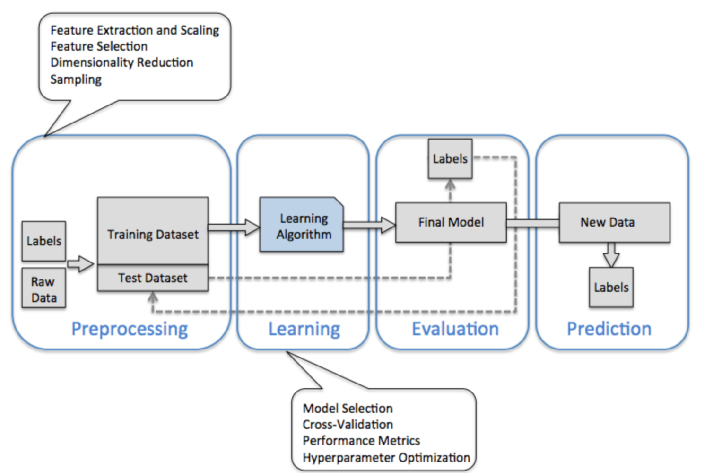

# Pre-processing the data
### Standardization
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler().fit(X_train)
 standardized_X = scaler.transform(X_train)
 standardized_X_test = scaler.transform(X_test)
### Normalization
 from sklearn.preprocessing import Normalizer
 scaler = Normalizer().fit(X_train)
 normalized_X = scaler.transform(X_train)
 normalized_X_test = scaler.transform(X_test)
### Encoding Categorical Features
 from sklearn.preprocessing import LabelEncoder
 enc = LabelEncoder()
 y = enc.fit_transform(y)
### Imputting Missing Values
 from sklearn.preprocessing import Imputer
 imp = Imputer(missing_values=0, strategy='mean', axis=0)
 imp.fit_transform(X_train)

### Training and Test data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<p style="text-align: center;"><img src="https://radonrad.com/machine-learning-cheet-sheet-2.png" class="img-fluid" alt="MLCHEAT"></p>

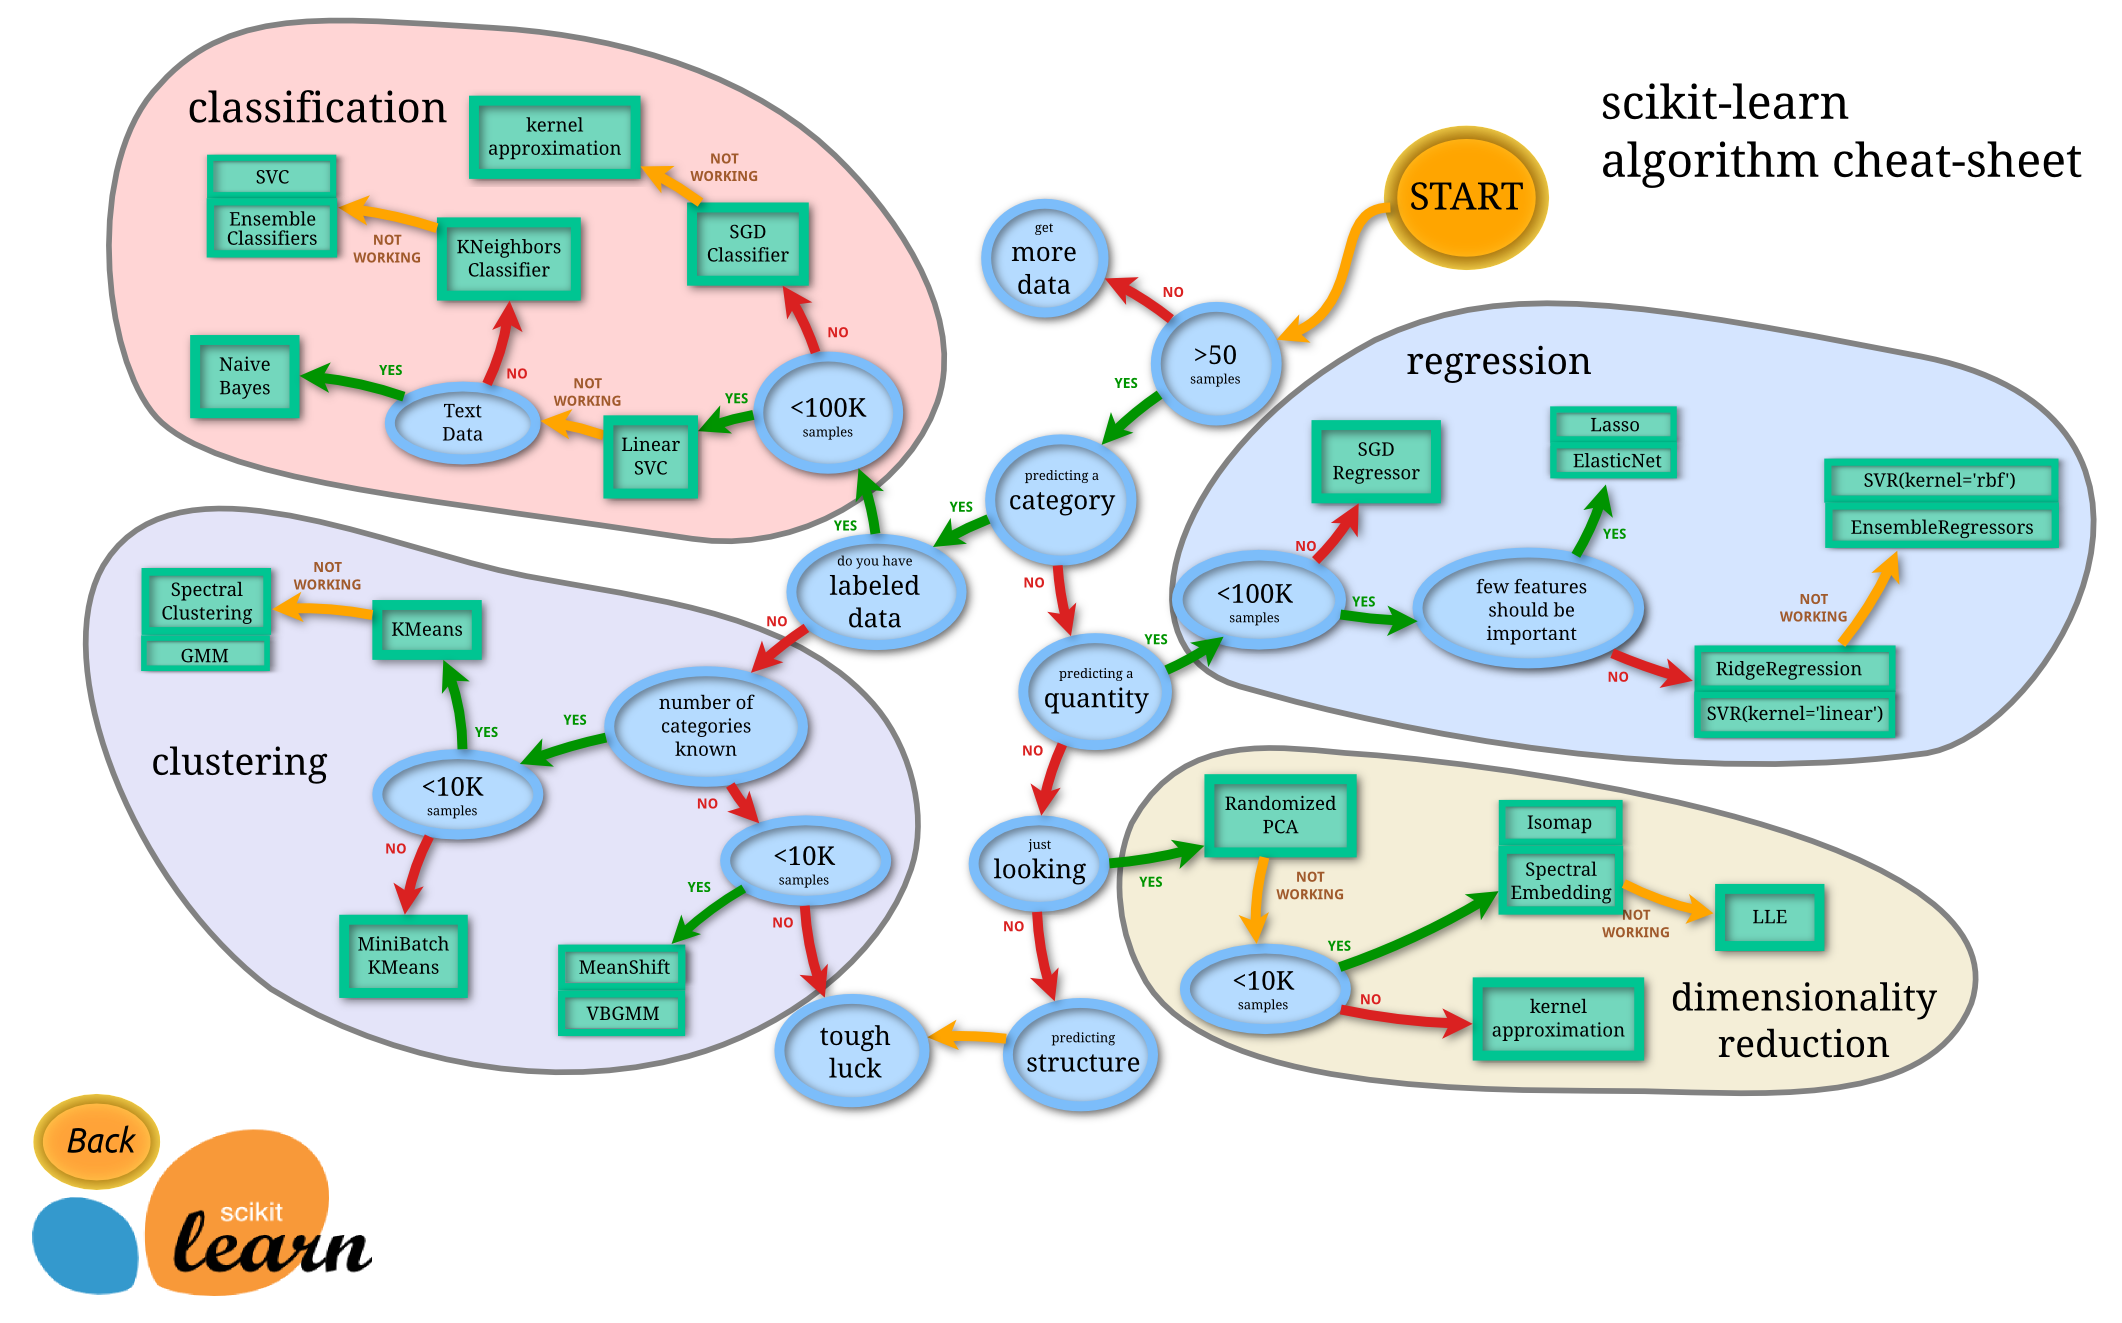

### Understanding Metrics
https://towardsdatascience.com/metrics-and-python-850b60710e0c
<p style="text-align: center;"><img src="https://radonrad.com/metrics.png" class="img-fluid" alt="MLCHEAT"></p>



https://scikit-learn.org/stable/modules/model_evaluation.html




In [2]:
import pandas as pd
import math
# ^^^ pyforest auto-imports - don't write above this line
table__from_outer_source = pd.read_html('https://scikit-learn.org/stable/modules/model_evaluation.html')
print(f'Total tables: {len(table__from_outer_source)}')
table__from_outer_source[0].style.applymap(lambda x: '' if x==x else 'background-color: yellow',subset=['Function'])


Total tables: 8


# DIMENSION REDUCTION

### PCA


Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.
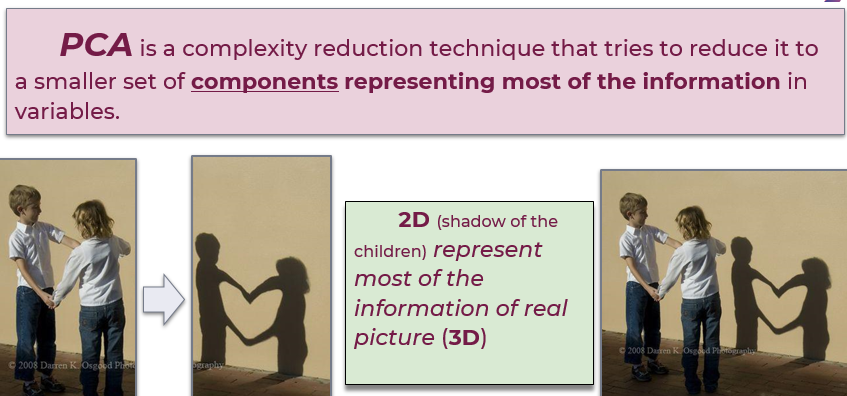




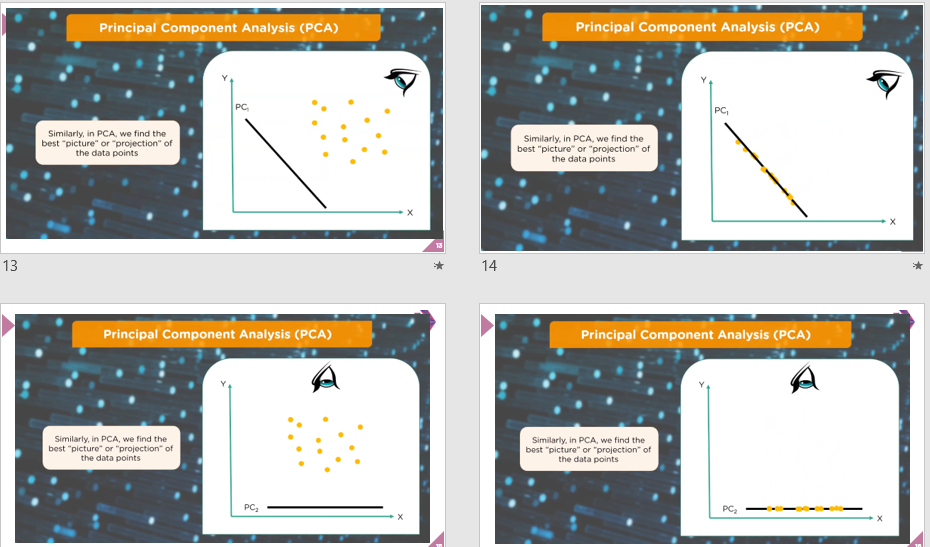

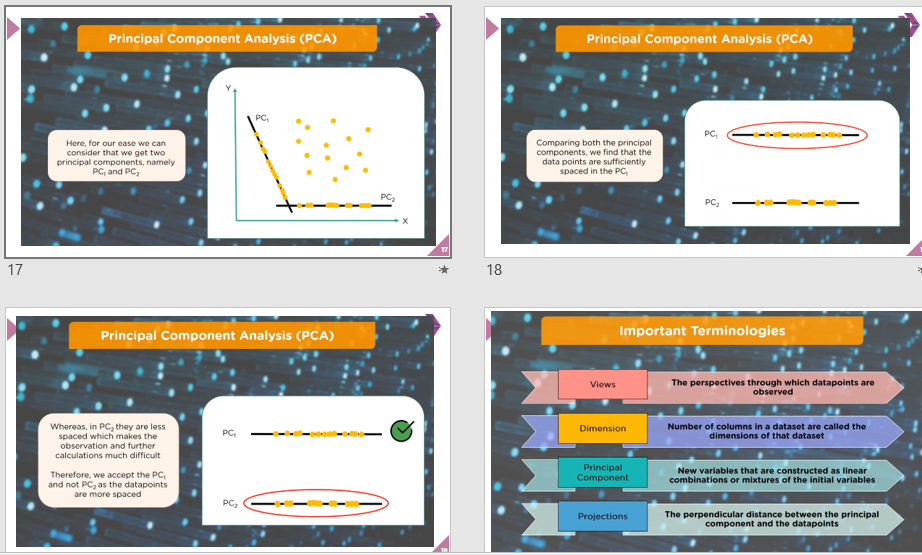

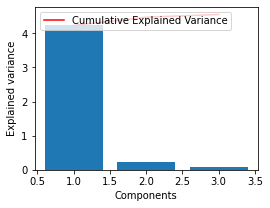

In [3]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')


plt.show()

# SUPERVISED LEARNING ->  REGRESSION

### LINEAR REGRESSION


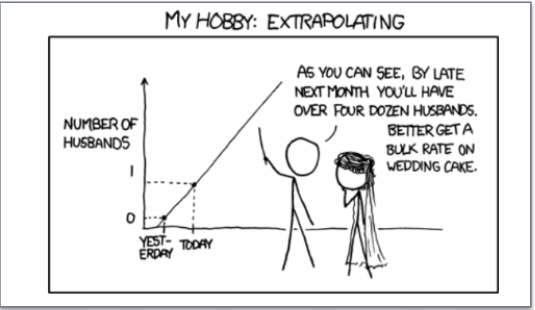

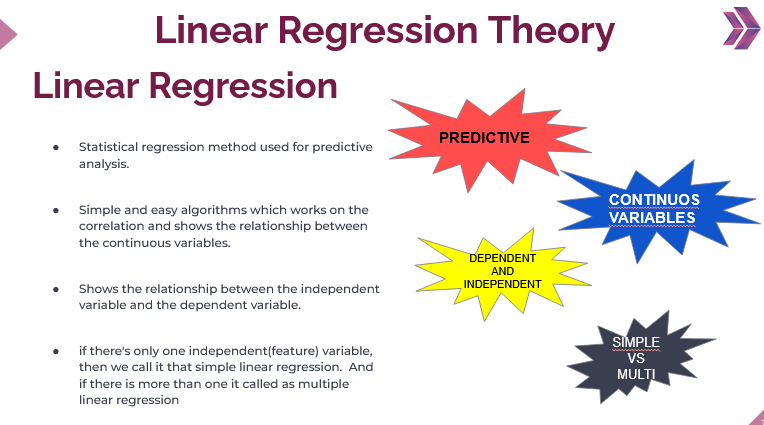

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


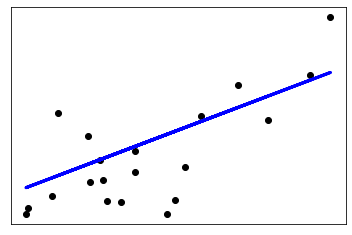

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### DECISION TREE -> REGRESSION

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

The branches/edges represent the result of the node and the nodes have either: 

    Conditions [Decision Nodes]
    Result [End Nodes]

### In regression trees, sum of squared error (SSE) is the criterion for tree split. The first split is based on the feature/predictor and its values in your training set that yields the lowest SSE value. And then so on for the further splits.

Advantages:

    Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
    A decision tree does not require normalization of data.
    A decision tree does not require scaling of data as well.
    Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
    A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

Disadvantage:

    A small change in the data can cause a large change in the structure of the decision tree causing instability.
    For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
    Decision tree often involves higher time to train the model.
    Decision tree training is relatively expensive as the complexity and time has taken are more.
    The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

[Text(0.5, 0.8333333333333334, 'X[0] <= 3.133\nsquared_error = 0.547\nsamples = 80\nvalue = 0.122'),
 Text(0.25, 0.5, 'X[0] <= 0.514\nsquared_error = 0.231\nsamples = 51\nvalue = 0.571'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.192\nsamples = 11\nvalue = 0.052'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.148\nsamples = 40\nvalue = 0.714'),
 Text(0.75, 0.5, 'X[0] <= 3.85\nsquared_error = 0.124\nsamples = 29\nvalue = -0.667'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.124\nsamples = 14\nvalue = -0.452'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.041\nsamples = 15\nvalue = -0.869')]

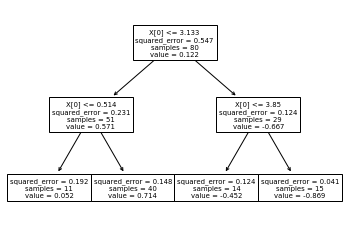

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
tree.plot_tree(regr_1)


[Text(0.4594594594594595, 0.9166666666666666, 'X[0] <= 3.133\nsquared_error = 0.547\nsamples = 80\nvalue = 0.122'),
 Text(0.16891891891891891, 0.75, 'X[0] <= 0.514\nsquared_error = 0.231\nsamples = 51\nvalue = 0.571'),
 Text(0.05405405405405406, 0.5833333333333334, 'X[0] <= 0.046\nsquared_error = 0.192\nsamples = 11\nvalue = 0.052'),
 Text(0.02702702702702703, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = -1.149'),
 Text(0.08108108108108109, 0.4166666666666667, 'X[0] <= 0.502\nsquared_error = 0.052\nsamples = 10\nvalue = 0.173'),
 Text(0.05405405405405406, 0.25, 'X[0] <= 0.258\nsquared_error = 0.035\nsamples = 9\nvalue = 0.221'),
 Text(0.02702702702702703, 0.08333333333333333, 'squared_error = 0.012\nsamples = 5\nvalue = 0.079'),
 Text(0.08108108108108109, 0.08333333333333333, 'squared_error = 0.007\nsamples = 4\nvalue = 0.398'),
 Text(0.10810810810810811, 0.25, 'squared_error = -0.0\nsamples = 1\nvalue = -0.263'),
 Text(0.28378378378378377, 0.5833333333333334, 'X[0] <

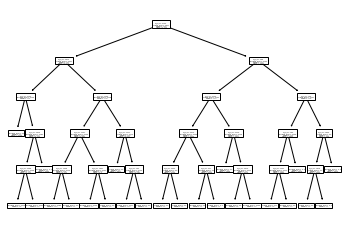

In [6]:
tree.plot_tree(regr_2)


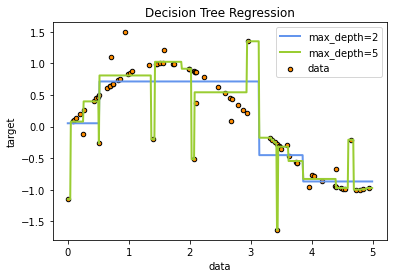

In [7]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### RANDOM FOREST -> REGRESSION
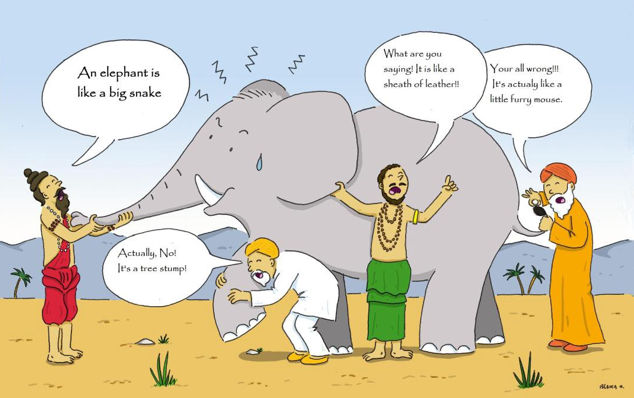

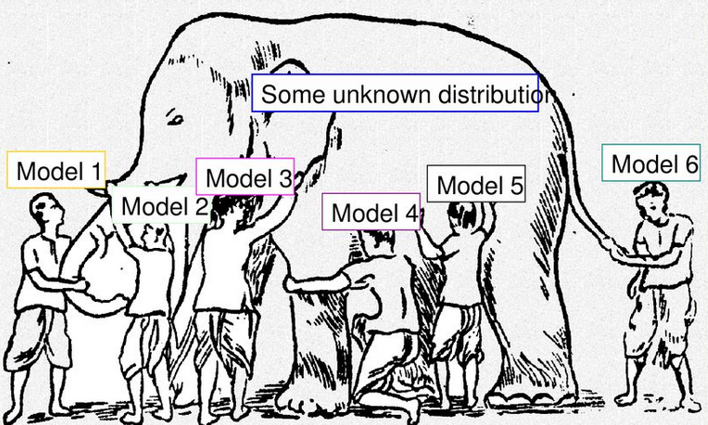

Random forest is an ensemble of decision tree algorithms.

It is an extension of bootstrap aggregation (bagging) of decision trees and can be used for classification and regression problems.

In bagging, a number of decision trees are created where each tree is created from a different bootstrap sample of the training dataset. A bootstrap sample is a sample of the training dataset where a sample may appear more than once in the sample, referred to as sampling with replacement.

Bagging is an effective ensemble algorithm as each decision tree is fit on a slightly different training dataset, and in turn, has a slightly different performance. Unlike normal decision tree models, such as classification and regression trees (CART), trees used in the ensemble are unpruned, making them slightly overfit to the training dataset. This is desirable as it helps to make each tree more different and have less correlated predictions or prediction errors.

Predictions from the trees are averaged across all decision trees resulting in better performance than any single tree in the model.




#Each model in the ensemble is then used to generate a prediction for a new sample and these m predictions are averaged to give the forest’s prediction

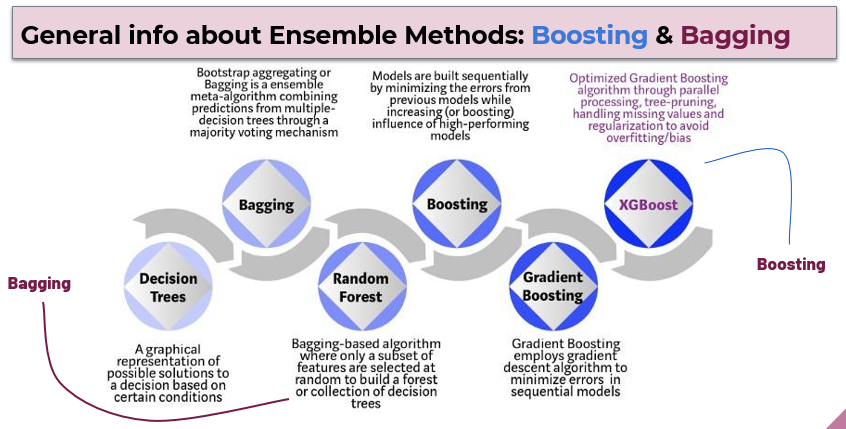

Advantages of Random Forest

    Random Forest is based on the bagging algorithm and uses Ensemble Learning technique. It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.

    Random Forest can be used to solve both classification as well as regression problems.

    Random Forest works well with both categorical and continuous variables.

    Random Forest can automatically handle missing values.

    No feature scaling required: No feature scaling (standardization and normalization) required in case of Random Forest as it uses rule based approach instead of distance calculation.

    Handles non-linear parameters efficiently: Non linear parameters don't affect the performance of a Random Forest unlike curve based algorithms. So, if there is high non-linearity between the independent variables, Random Forest may outperform as compared to other curve based algorithms.

    Random Forest can automatically handle missing values.

    Random Forest is usually robust to outliers and can handle them automatically.

    Random Forest algorithm is very stable. Even if a new data point is introduced in the dataset, the overall algorithm is not affected much since the new data may impact one tree, but it is very hard for it to impact all the trees.

    Random Forest is comparatively less impacted by noise.

Disadvantages of Random Forest

    Complexity: Random Forest creates a lot of trees (unlike only one tree in case of decision tree) and combines their outputs. By default, it creates 100 trees in Python sklearn library. To do so, this algorithm requires much more computational power and resources. On the other hand decision tree is simple and does not require so much computational resources.

    Longer Training Period: Random Forest require much more time to train as compared to decision trees as it generates a lot of trees (instead of one tree in case of decision tree) and makes decision on the majority of votes.




Boston housing dataset prediction.
R-squared: 0.9802771744990787
MSE:  0.1517421931052131
RMSE:  0.07587109655260656


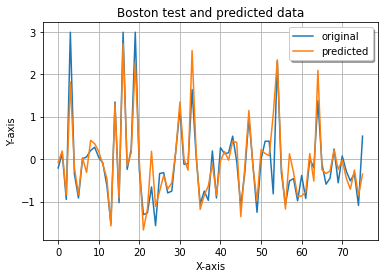

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
print("Boston housing dataset prediction.")
boston = load_boston()

X, Y = boston.data, boston.target

x = scale(X)
y = scale(Y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)

score = rfr.score(xtrain, ytrain)
print("R-squared:", score)

ypred = rfr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()



### Gradient Boosting Tree -> Regression




Gradient Boosting algorithm is used to generate an ensemble model by combining the weak learners or weak predictive models. Gradient boosting algorithm can be used to train models for both regression and classification problem. Gradient Boosting Regression algorithm is used to fit the model which predicts the continuous value.

Gradient boosting builds an additive mode by using multiple decision trees of fixed size as weak learners or weak predictive models. The parameter, n_estimators, decides the number of decision trees which will be used in the boosting stages. Gradient boosting differs from AdaBoost in the manner that decision stumps (one node & two leaves) are used in AdaBoost whereas decision trees of fixed size are used in Gradient Boosting.

    Gradient Boosting algorithm represents creation of forest of fixed number of decision trees which are called as weak learners or weak predictive models. These decision trees are of fixed size or depth.
    The gradient boosting starts with mean of target values and add the prediction / outcome / contribution from subsequent trees by shrinking it with what is called as learning rate.
    The decision trees or estimators are trained to predict the negative gradient of the data samples.
    Gradient Boosting Regression algorithm is used to fit the model which predicts the continuous value.

Model Accuracy: 0.917
The mean squared error (MSE) on test set: 5.1752


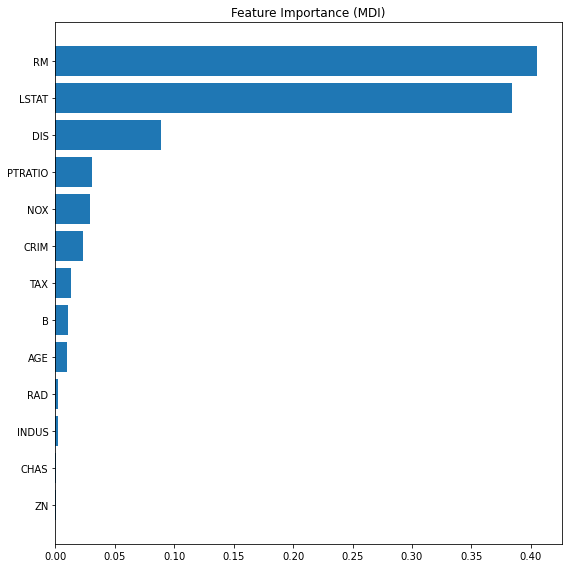

In [9]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
#
# Load the Boston Dataset
#
bhp = datasets.load_boston()
#
# Create Training and Test Split
#
X_train, X_test, y_train, y_test = train_test_split(bhp.data, bhp.target, random_state=42, test_size=0.1)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(bhp.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

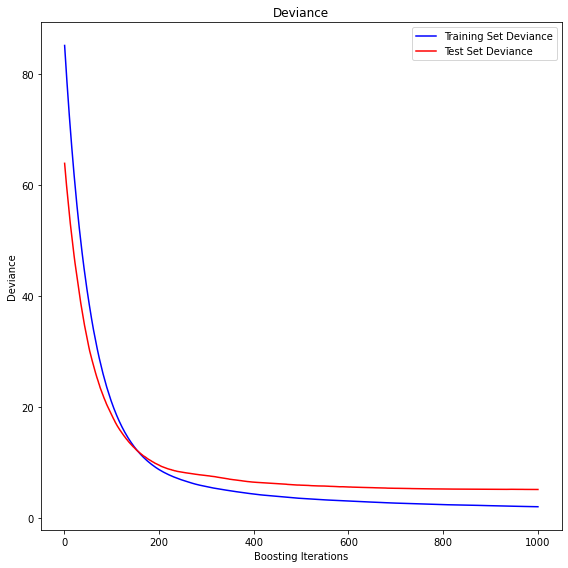

In [10]:
### Assessing the Training & Test Deviance (loss)
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test_std)):
    test_score[i] = gbr.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# SUPERVISED LEARNING ->  CLASSIFICATTON

In [11]:
table__from_outer_source = pd.read_html('https://scikit-learn.org/stable/modules/model_evaluation.html')
print(f'Total tables: {len(table__from_outer_source)}')
table__from_outer_source[0].style.applymap(lambda x: '' if x==x else 'background-color: yellow',subset=['Function'])

Total tables: 8


### KERNEL SVM -> CLASSIFICATION

Advantages:

    SVM works relatively well when there is a clear margin of separation between classes.
    SVM is more effective in high dimensional spaces.
    SVM is effective in cases where the number of dimensions is greater than the number of samples.
    SVM is relatively memory efficient

Disadvantages:

    SVM algorithm is not suitable for large data sets.
    SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
    In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
    As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.

### Svm Kernel Functions
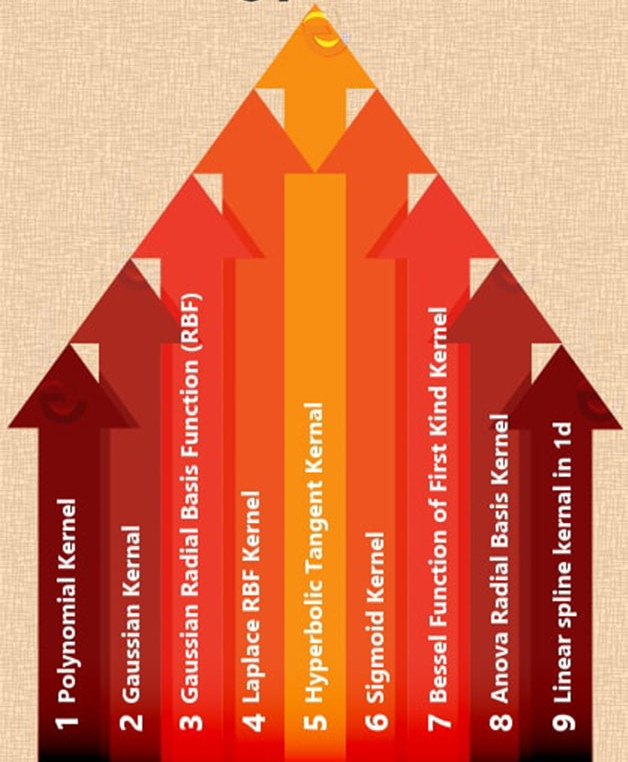

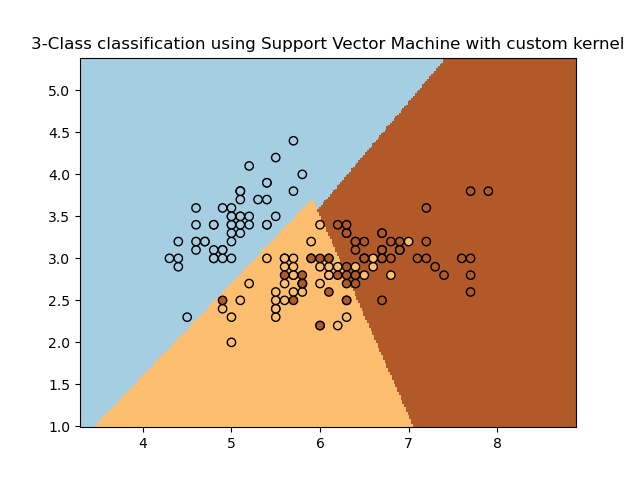

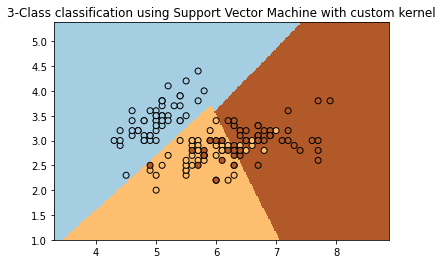

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = 0.02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()

### Decision Tree -> CLASSIFICATION

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

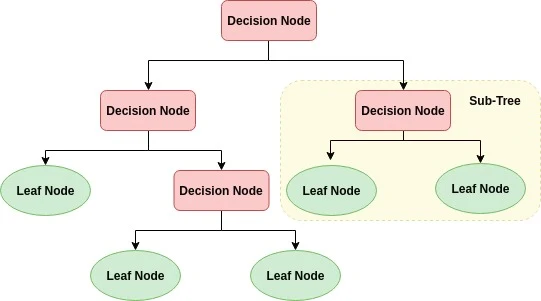

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy. 

Advantages:

    Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
    A decision tree does not require normalization of data.
    A decision tree does not require scaling of data as well.
    Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
    A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

Disadvantage:

    A small change in the data can cause a large change in the structure of the decision tree causing instability.
    For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
    Decision tree often involves higher time to train the model.
    Decision tree training is relatively expensive as the complexity and time has taken are more.
    The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics


# load dataset
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

# accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))


[[112  34]
 [ 46  39]]
Accuracy: 0.6536796536796536


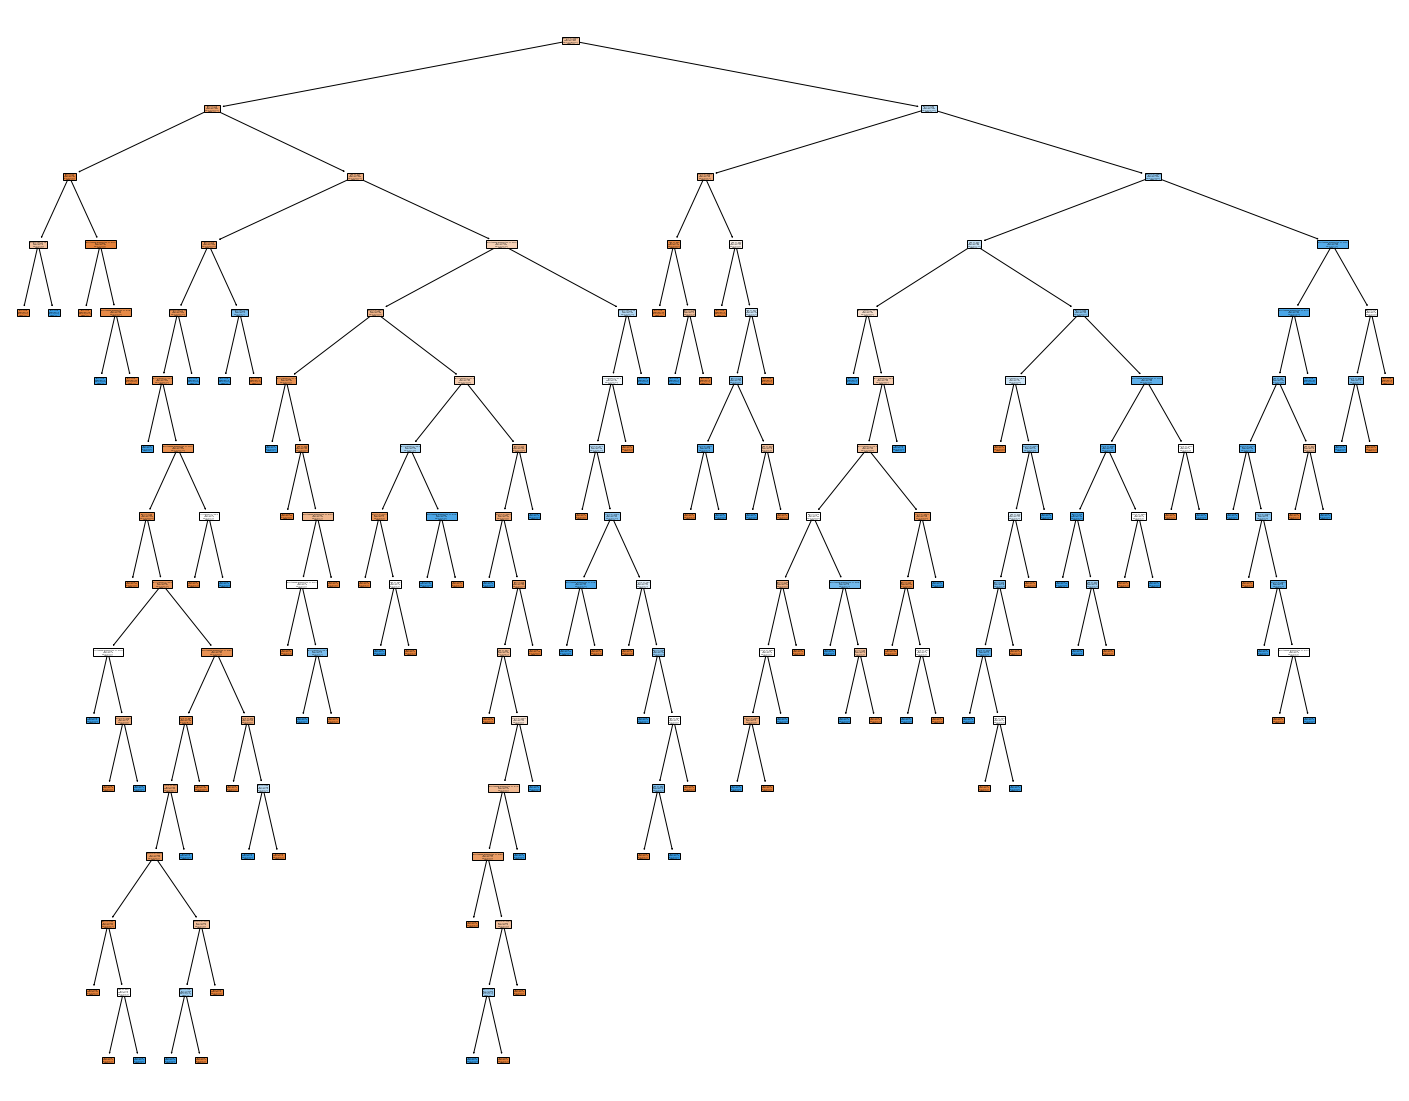

In [15]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)
plt.show()


### Random Forest -> CLASSIFICATION

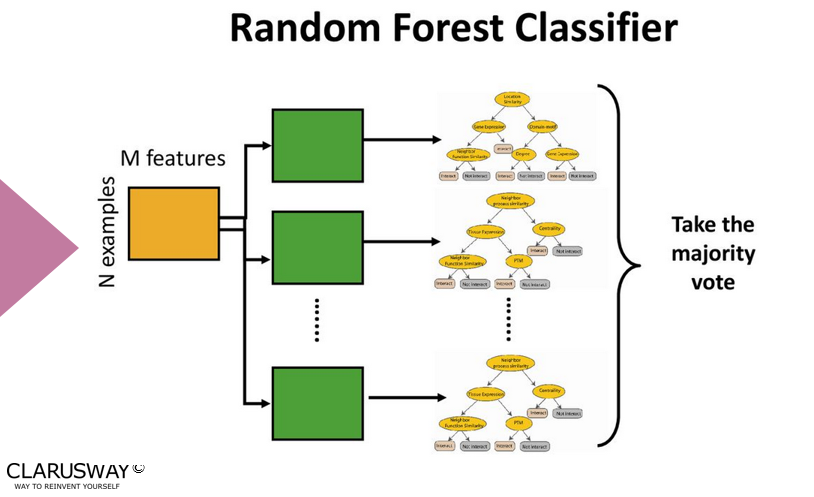

Advantages of Random Forest

1. Random Forest is based on the bagging algorithm and uses Ensemble Learning technique. It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.

2. Random Forest can be used to solve both classification as well as regression problems.

3. Random Forest works well with both categorical and continuous variables.

4. Random Forest can automatically handle missing values.

5. No feature scaling required: No feature scaling (standardization and normalization) required in case of Random Forest as it uses rule based approach instead of distance calculation.

6. Handles non-linear parameters efficiently: Non linear parameters don't affect the performance of a Random Forest unlike curve based algorithms. So, if there is high non-linearity between the independent variables, Random Forest may outperform as compared to other curve based algorithms.

7. Random Forest can automatically handle missing values.

8. Random Forest is usually robust to outliers and can handle them automatically.

9. Random Forest algorithm is very stable. Even if a new data point is introduced in the dataset, the overall algorithm is not affected much since the new data may impact one tree, but it is very hard for it to impact all the trees.

10. Random Forest is comparatively less impacted by noise.

Disadvantages of Random Forest

1. Complexity: Random Forest creates a lot of trees (unlike only one tree in case of decision tree) and combines their outputs. By default, it creates 100 trees in Python sklearn library. To do so, this algorithm requires much more computational power and resources. On the other hand decision tree is simple and does not require so much computational resources.

2. Longer Training Period: Random Forest require much more time to train as compared to decision trees as it generates a lot of trees (instead of one tree in case of decision tree) and makes decision on the majority of votes.

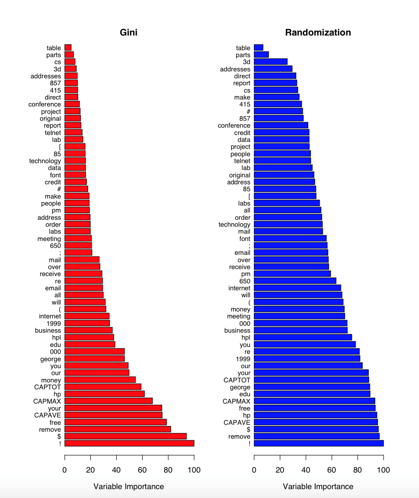

In [16]:
### GRADIENT BOOSTING -> CLASSIFICATION

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

Gradient boosting models are powerful algorithms which can be used for both classification and regression tasks. Gradient boosting models can perform incredibly well on very complex datasets, but they are also prone to overfitting, which can be combated with several of the methods described above. Gradient boosting classifiers are also easy to implement in Scikit-Learn.


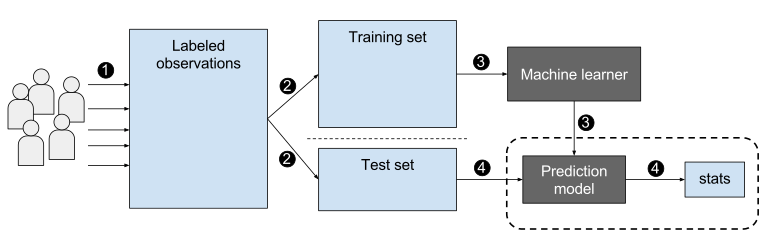

Advantages of Gradient Boosting are:

    Often provides predictive accuracy that cannot be trumped.
    Lots of flexibility - can optimize on different loss functions and provides several hyper parameter tuning options that make the function fit very flexible.
    No data pre-processing required - often works great with categorical and numerical values as is.
    Handles missing data - imputation not required.

Disadvantages of Gradient Boosting are:

    Gradient Boosting Models will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting.
    Computationally expensive - often require many trees (>1000) which can be time and memory exhaustive.
    The high flexibility results in many parameters that interact and influence heavily the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning.
    Less interpretative in nature, although this is easily addressed with various tools.

In order to implement a gradient boosting classifier, we'll need to carry out a number of different steps. We'll need to:

    Fit the model
    Tune the model's parameters and Hyperparameters
    Make predictions
    Interpret the results
    
    
Penalized Learning

Certain constraints can be utilized to prevent overfitting, depending on the structure of the decision tree. The type of decision tree used in gradient boosting is a regression tree, which has numeric values as leaves or weights. These weight values can be regularized using the different regularization methods, like L1 or L2 regularization weights, which penalizes the radiant boosting algorithm.


Tree Constraints

The decision tree can be constrained in numerous ways, such as limiting the tree depth, imposing a limit on the number of leaves or nodes of the tree, limiting the number of observations per split, and limiting the number of observations trained on. In general, the more constraints you use when creating trees, the more trees the model will need to properly fit the data.


Random Sampling/Stochastic Boosting

Taking random subsamples of the training data set, a technique referred to as stochastic gradient boosting, can also help prevent overfitting. This technique essentially reduces the strength of the correlation between trees.

There are multiple ways to subsample the data set, such as subsampling columns before each split, subsampling columns before creating a tree, as subsampling rows before creating a tree. In general, subsampling at large rates not exceeding 50% of the data seems to be beneficial to the model.


Shrinkage/Weighted Updates

Because the predictions of each tree are summed together, the contributions of the trees can be inhibited or slowed down using a technique called shrinkage. A "learning rate" is adjusted, and when the learning rate is reduced more trees must be added to the model. This makes it so that the model needs longer to train.

There's a trade-off between the learning rate and the number of trees needed, so you'll have to experiment to find the best values for each of the parameters, but small values less than 0.1 or values between 0.1 and 0.3 often work well.


XGBoost

XGBoost is a refined and customized version of a gradient boosting decision tree system, created with performance and speed in mind. XGBoost actually stands for "eXtreme Gradient Boosting", and it refers to the fact that the algorithms and methods have been customized to push the limit of what is possible for gradient boosting algorithms.


In [17]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(X, y)
# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Accuracy: 0.915 (0.025)
Prediction: 1


### Histogram based...

In [18]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
model = HistGradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = HistGradientBoostingClassifier()
model.fit(X, y)
# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Accuracy: 0.934 (0.027)
Prediction: 1


In [19]:
### xgboost based

In [20]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(X, y)
# make a single prediction
row = [2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Accuracy: 0.936 (0.019)
[15:00:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction: 1


### LOGISTIC REGRESSION -> CLASSIFICATION

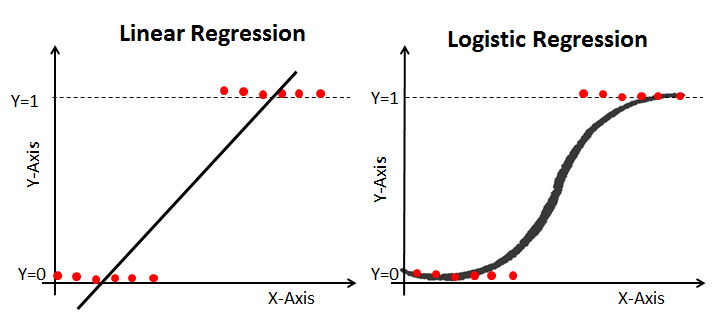

Sigmoid Function

The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.

Advantages

Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.


Disadvantages

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


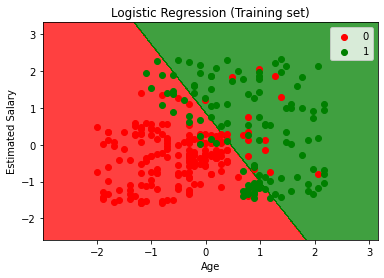

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,   step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


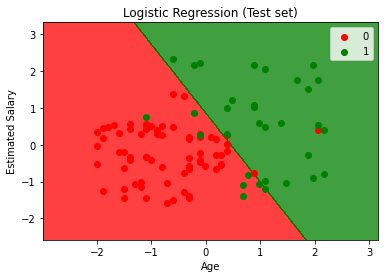

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Naive Bayes -> Classification

‘Naive Bayes‘, which can be extremely fast relative to other classification algorithms. It works on Bayes theorem of probability to predict the class of unknown data sets.

What is Naive Bayes algorithm?

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Step 1: Convert the data set into a frequency table

Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.

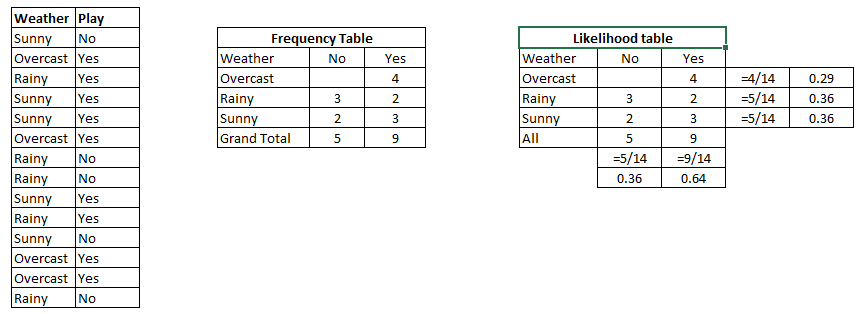

Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

Advantages:

    It is easy and fast to predict class of test data set. It also perform well in multi class prediction
    When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
    It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

Disadvantages:

    If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
    On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
    Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.


In [24]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# read the train and test dataset
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

model = GaussianNB()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Shape of training data : (179, 25)
Shape of testing data : (712, 25)
Target on train data [0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0]
accuracy_score on train dataset :  0.8268156424581006
Target on test data [0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 1 0 1 0 1

### LINEAR SVM -> CLASSIFICATION

A regular SVM with default values uses a radial basis function as the SVM kernel. This is basically a Gaussian kernel aka bell-curve. Meaning that the no man's land between different classes is created with a Gaussian function. The linear-SVM uses a linear kernel for the basis function, so you can think of this as a ^ shaped function. It is much less tunable and is basically just a linear interpolation.

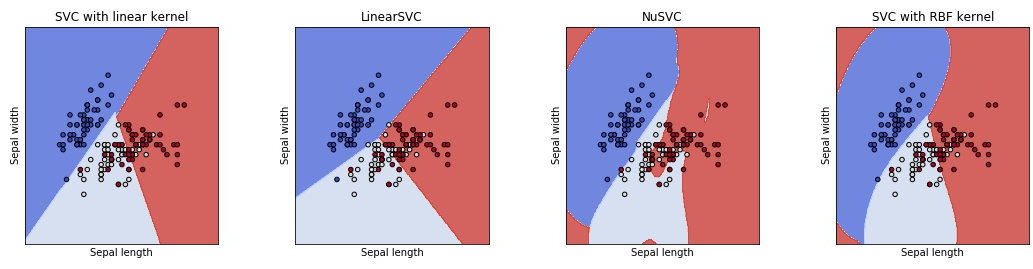

1) SVC : C-Support Vector Classification

SVC uses the parameter C as the penalty parameter of the error term. The default value of parameter C is 1.0.

2) NuSVC : Nu-Support Vector Classification

NuSVC is similar to SVC but uses a new parameter nu which controls the number of support vectors and training errors. The parameter nu is an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. The value of nu should be in the interval (0,1]

3) LinearSVC : Linear Support Vector Classification

LinearSVC is Similar to SVC with parameter kernel=’linear’. Note that LinearSVC does not accept keyword kernel, as this is assumed to be linear.

Advantages:

    SVM works relatively well when there is a clear margin of separation between classes.
    SVM is more effective in high dimensional spaces.
    SVM is effective in cases where the number of dimensions is greater than the number of samples.
    SVM is relatively memory efficient

Disadvantages:

    SVM algorithm is not suitable for large data sets.
    SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
    In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
    As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.

In [25]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

x, y = make_classification(n_samples=5000, n_features=10, 
                           n_classes=3, 
                           n_clusters_per_class=1)

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

lsvc = LinearSVC()
print(lsvc)

lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lsvc.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 


# Iris dataset classification
print("Iris dataset classification with SVC")
iris = load_iris()
x, y = iris.data, iris.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

lsvc = LinearSVC()
print(lsvc)

lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

ypred = lsvc.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr) 

LinearSVC()
Score:  0.859764705882353
CV average score: 0.86
[[200  39  15]
 [ 37 229   0]
 [ 15   6 209]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       254
           1       0.84      0.86      0.85       266
           2       0.93      0.91      0.92       230

    accuracy                           0.85       750
   macro avg       0.85      0.85      0.85       750
weighted avg       0.85      0.85      0.85       750

Iris dataset classification with SVC
LinearSVC()
Score:  0.968503937007874
CV average score: 0.95
[[7 0 0]
 [0 7 2]
 [0 0 7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.78      0.88         9
           2       0.78      1.00      0.88         7

    accuracy                           0.91        23
   macro avg       0.93      0.93      0.92        23
weighted avg       0.93      0.91      0.91        23



# CLASSIFIER COMPARISON

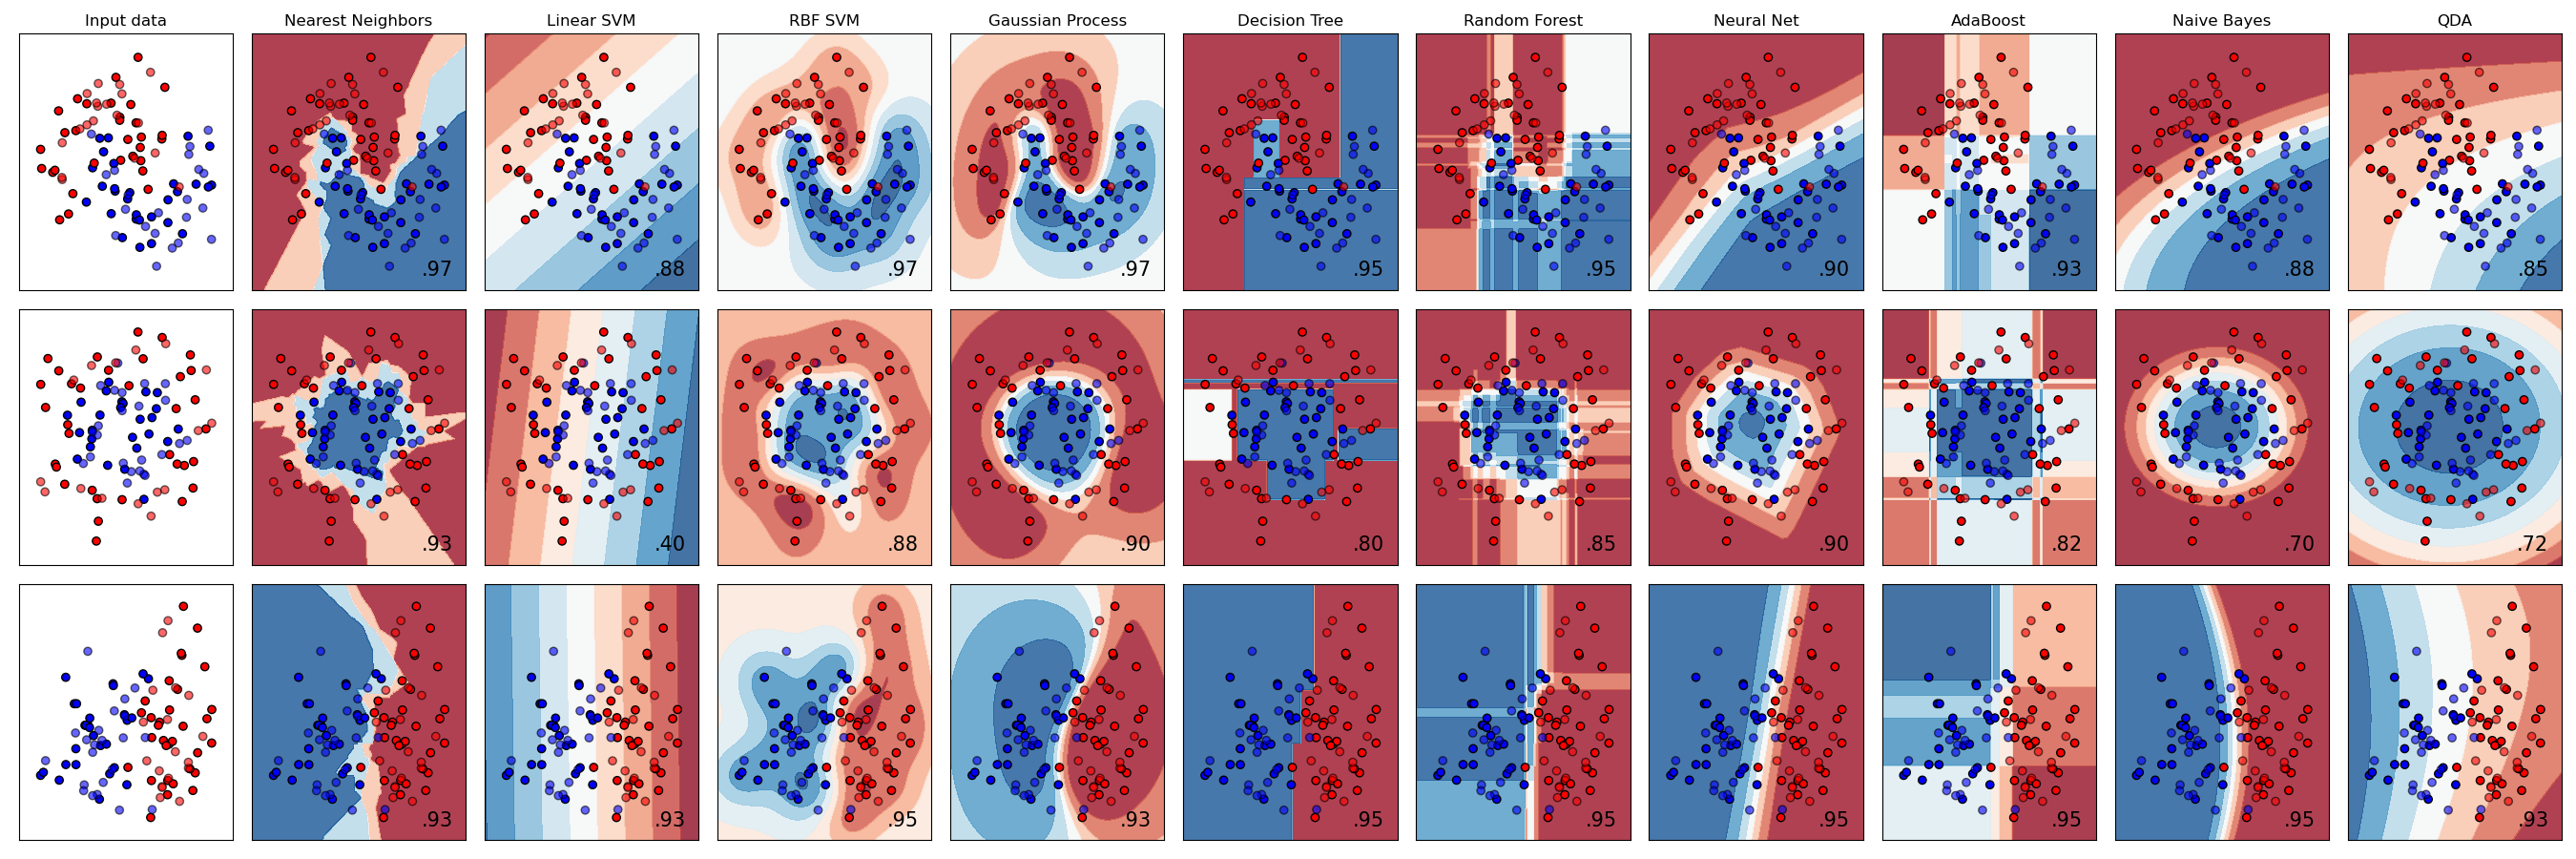

This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

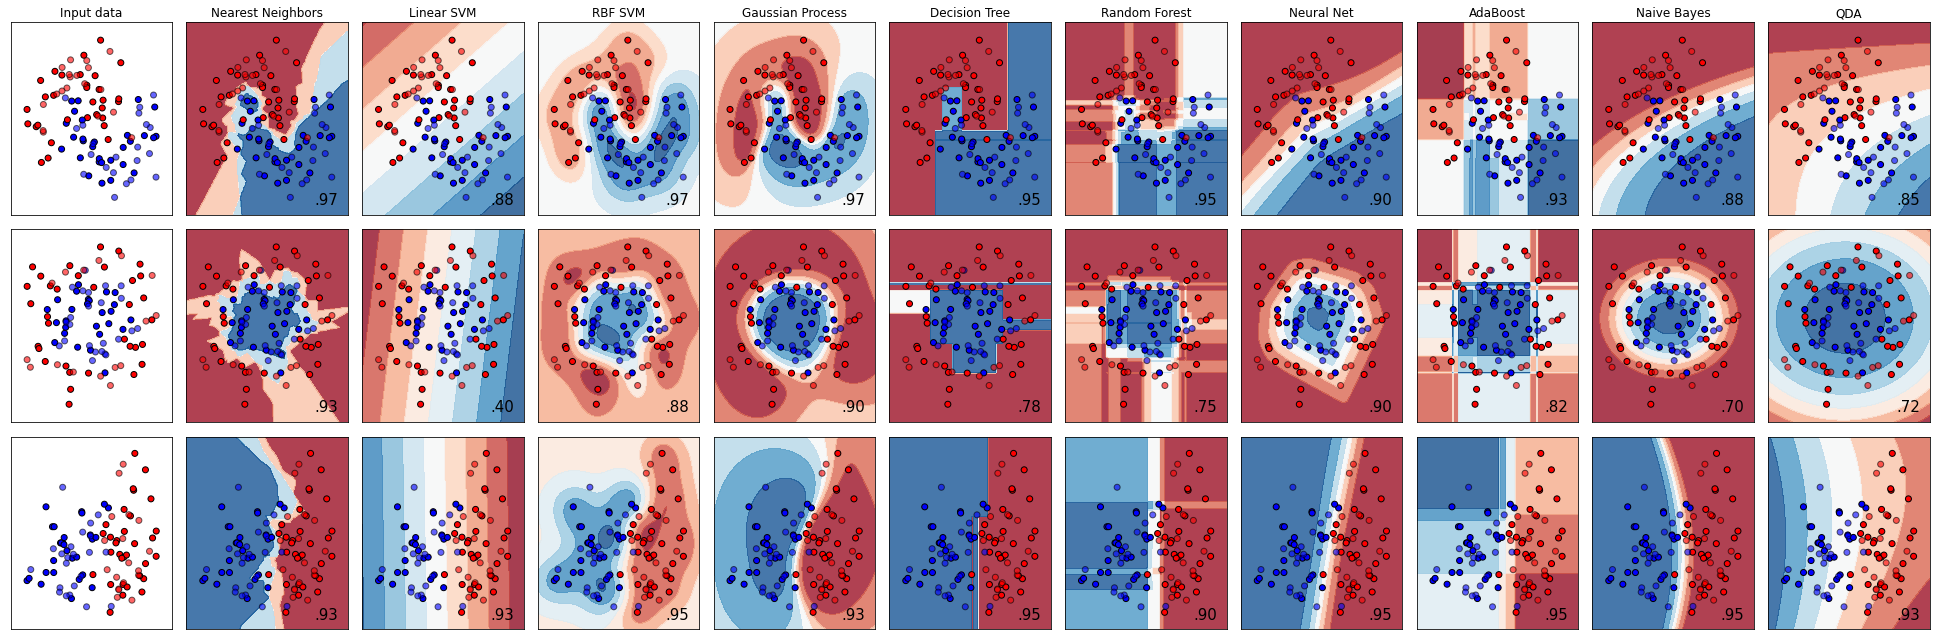

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

# UNSUPERVISED LEARNING

### CLUSTERING

### Hierarchical Clustering -> CLUSTERING

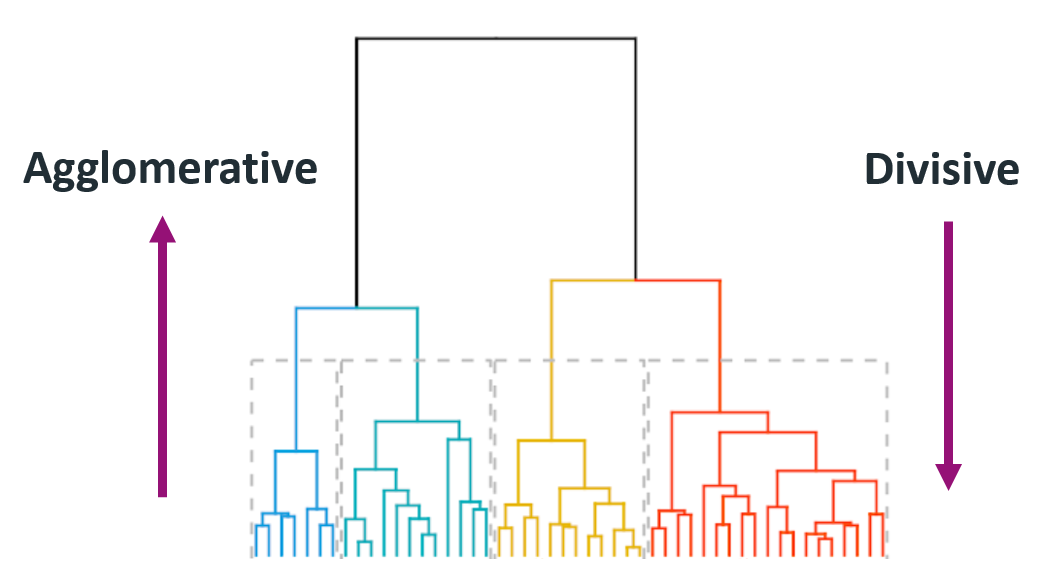

Hierarchical clustering is a kind of clustering that uses either top-down or bottom-up approach in creating clusters from data. It either starts with all samples in the dataset as one cluster and goes on dividing that cluster into more clusters or it starts with single samples in the dataset as clusters and then merges samples based on criteria to create clusters with more samples.

We can visualize the results of clustering as a dendrogram as hierarchical clustering progress. This helps us in deciding when we want to stop clustering further (how "deep") by setting "depth" with some threshold.

It has 2 types

    Agglomerative Clustering (bottom-up approach) - We start with single samples and clusters and keep on combining them into clusters until we are left with a single cluster.
    Divisive Clustering (top-down approach) - We start with the whole dataset as one cluster and then keep on dividing it into small clusters until each consists of a single sample.

To understand agglomerative clustering & divisive clustering, we need to understand concepts of single linkage and complete linkage. Single linkage helps in deciding the similarity between 2 clusters which can then be merged into one cluster. Complete linkage helps with divisive clustering which is based on dissimilarity measures between clusters. Divisive Clustering chooses the object with the maximum average dissimilarity and then moves all objects to this cluster that are more similar to the new cluster than to the remainder.

    Single Linkage: We take pairs of most similar samples in each cluster and merge 2 clusters that have the most similar 2 members into the new cluster.
    Complete Linkage: We take pairs of most dissimilar samples in each cluster and then merge them into 2 clusters where dissimilarity distance is least.
    Average Linkage: We take pairs of most similar samples in each cluster using average distance and merge 2 clusters which have the most similar 2 members into the new cluster.
    Ward: Minimizes the sum of squared distance between all pairs of clusters. Its concept is the same as KMeans but the approach is hierarchical.


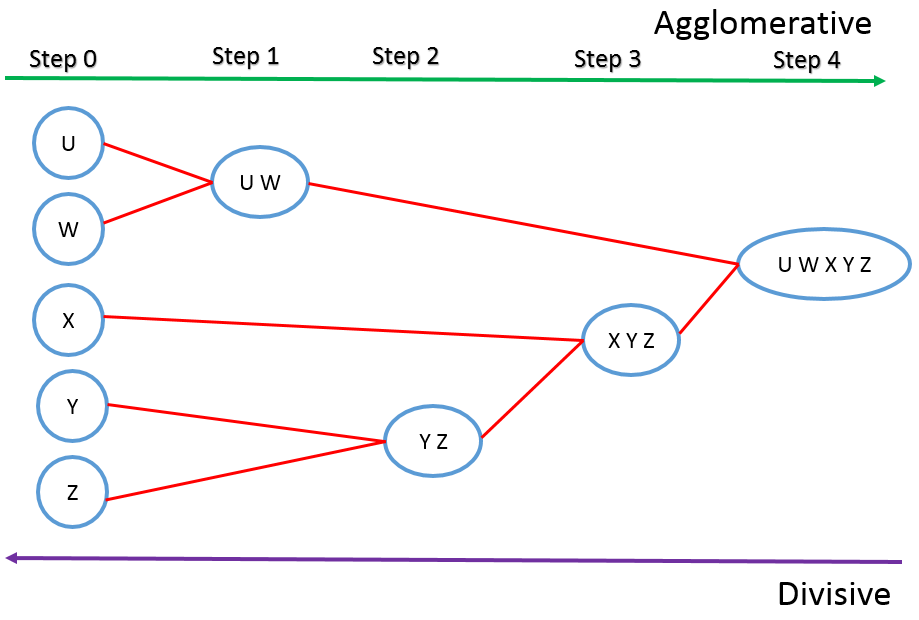

Advantages 
•  Hierarchical clustering outputs a hierarchy, ie a structure that is more informaHve than 
the unstructured set of flat clusters returned by k-­‐means. Therefore, it is easier to decide 
on the number of clusters by looking at the dendrogram (see suggesHon on how to cut a dendrogram in lab8). 
•  Easy to implement 


Disavantages 
•  It is not possible to undo the previous step: once the instances have been assigned to a cluster, they can no longer be moved around.  
•  Time complexity: not suitable for large datasets 
•  IniHal seeds have a strong impact on the final results 
•  The order of the data has an impact on the final results 
•  Very sensiHve to outliers 

In [27]:
from sklearn import datasets

import scipy
from scipy.cluster import hierarchy

iris = datasets.load_iris()
X, Y = iris.data[:, [2,3]], iris.target

print("Dataset Features : ", iris.feature_names)
print("Dataset Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape)

Dataset Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 2) (150,)


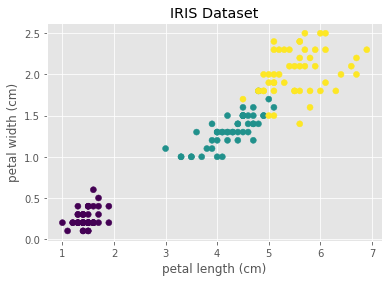

In [28]:
with plt.style.context("ggplot"):
    plt.scatter(X[:,0], X[:, 1], c=Y)
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.title("IRIS Dataset")

In [29]:
clusters = hierarchy.linkage(X, method="complete")

clusters[:10]

array([[  0.,   1.,   0.,   2.],
       [  4., 150.,   0.,   3.],
       [  2.,  36.,   0.,   2.],
       [  3.,   7.,   0.,   2.],
       [  8., 151.,   0.,   4.],
       [  6.,  17.,   0.,   2.],
       [ 10., 153.,   0.,   3.],
       [ 28., 154.,   0.,   5.],
       [  9.,  32.,   0.,   2.],
       [ 27., 156.,   0.,   4.]])

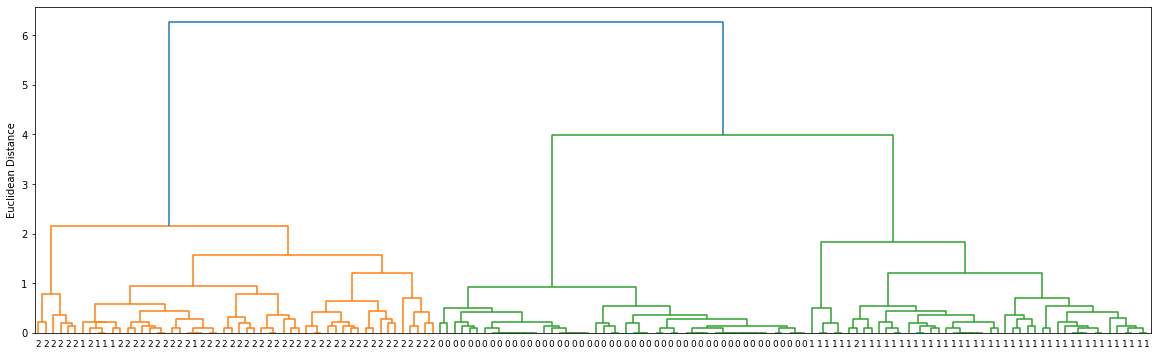

In [30]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, labels=Y, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance');

plot_dendrogram(clusters)

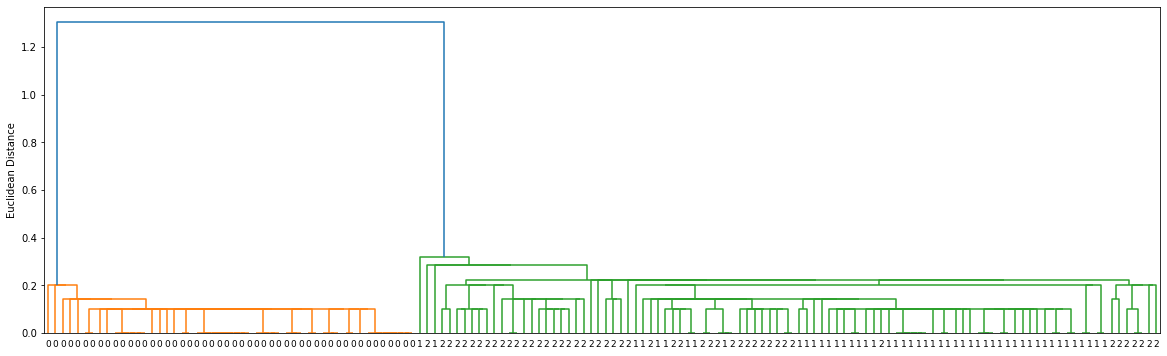

In [31]:
clusters = hierarchy.linkage(X, method="single")

clusters[:5]
plot_dendrogram(clusters)

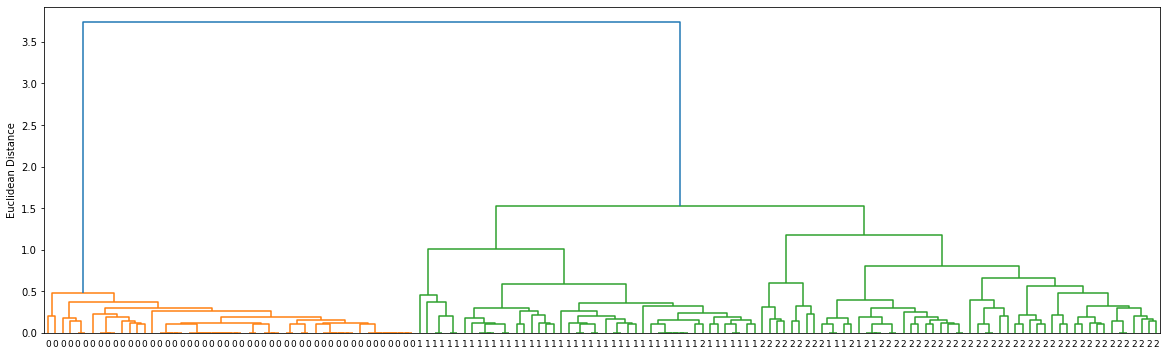

In [32]:
clusters = hierarchy.linkage(X, method="average")

clusters[:5]
plot_dendrogram(clusters)

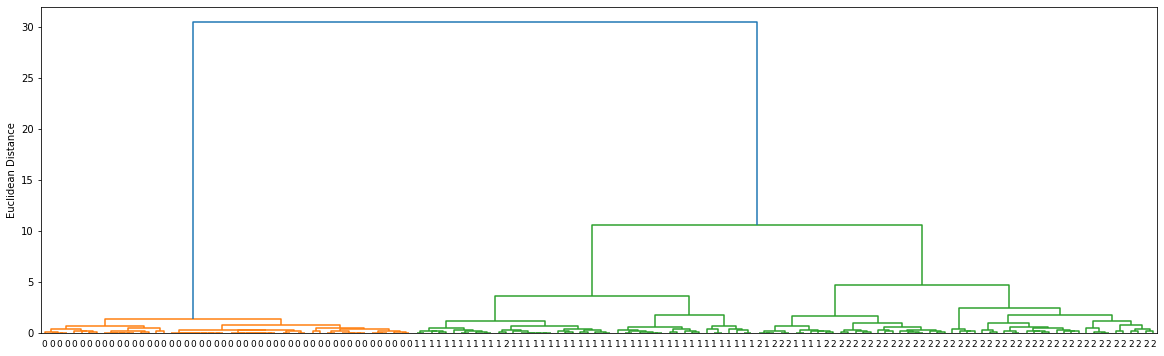

In [33]:
clusters = hierarchy.linkage(X, method="ward")

clusters[:5]
plot_dendrogram(clusters)

AgglomerativeClustering on IRIS data loaded earlier with linkage algorithm as ward. We'll fit the model on train data and predict labels using the fit_predict() method. We'll be using the default euclidean method of measuring distance between two points of data.

In [34]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, linkage="ward")
Y_preds = clustering.fit_predict(X)

Y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(Y, Y_preds)

0.8857921001989628

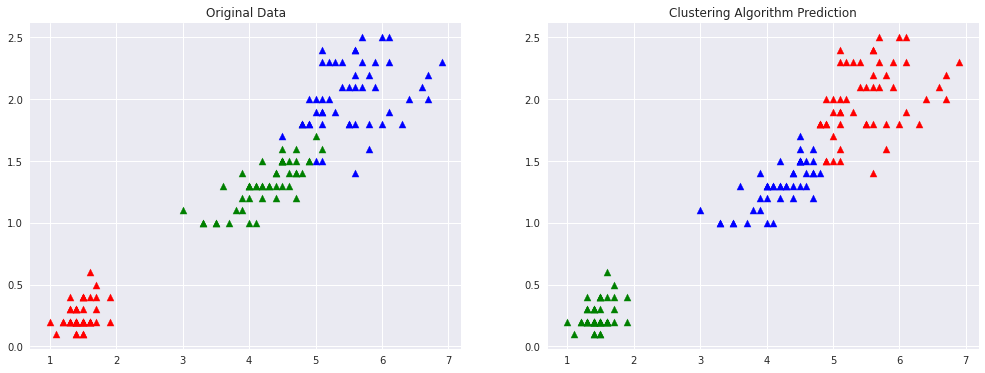

In [36]:
def plot_actual_prediction_iris(X, Y, Y_preds):
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))

        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="^", s=50)
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="^", s=50)

        plt.title("Clustering Algorithm Prediction");

plot_actual_prediction_iris(X, Y, Y_preds)

### K_MODES -> CLUSTERING

KModes clustering is one of the unsupervised Machine Learning algorithms that is used to cluster categorical variables.

KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means.
But for categorical data points, we cannot calculate the distance. So we go for KModes algorithm. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means.

Unlike Hierarchical clustering methods, we need to upfront specify the K.

    Pick K observations at random and use them as leaders/clusters
    Calculate the dissimilarities and assign each observation to its closest cluster
    Define new modes for the clusters
    Repeat 2–3 steps until there are is no re-assignment required
    
   

In [37]:
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
bank = pd.read_csv('bankmarketing.csv')

In [38]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]


bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)
bank_cust.isnull().sum()*100/bank_cust.shape[0]
bank_cust_copy = bank_cust.copy()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)

from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [39]:


clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)
fitClusters_huang


cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11192, cost: 192578.0
Run 1, iteration: 2/100, moves: 212, cost: 192578.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


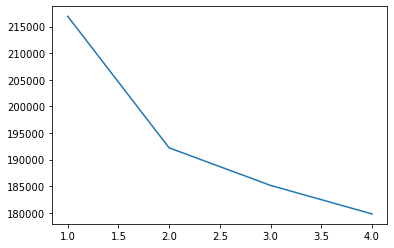

In [40]:


y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)



In [41]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)
bank_cust = bank_cust_copy.reset_index()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [42]:


clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)



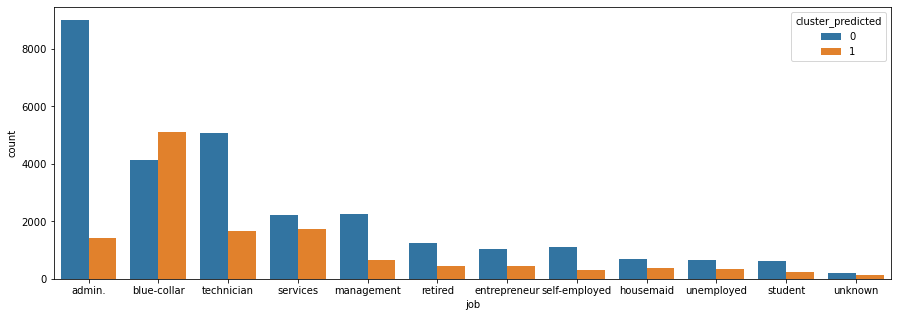

In [43]:


cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

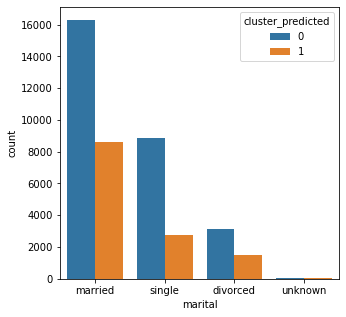

In [44]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

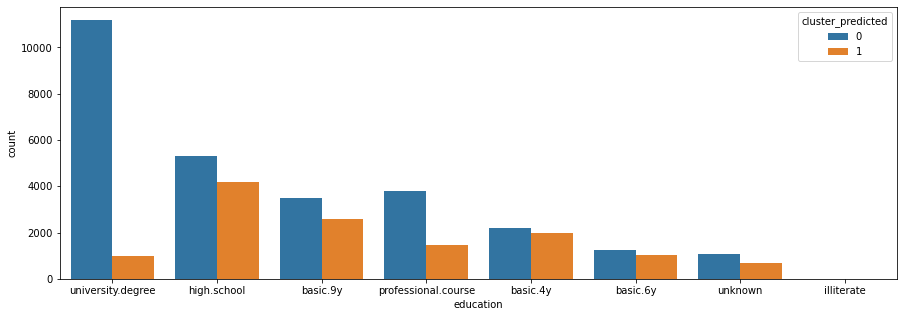

In [45]:


plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()



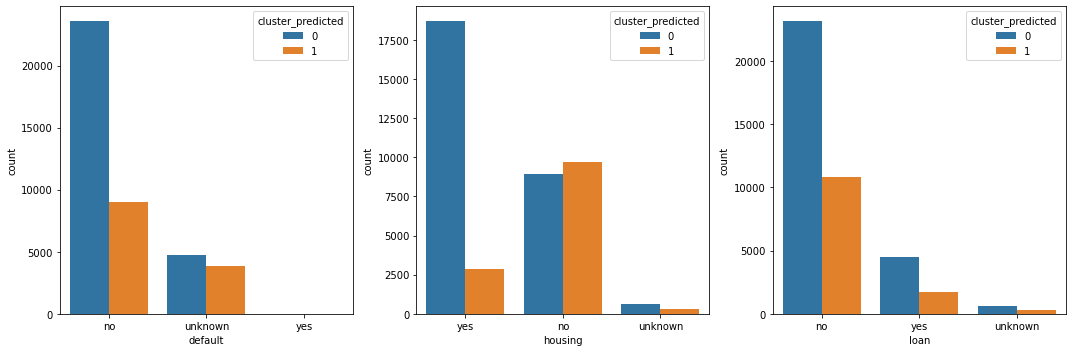

In [46]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

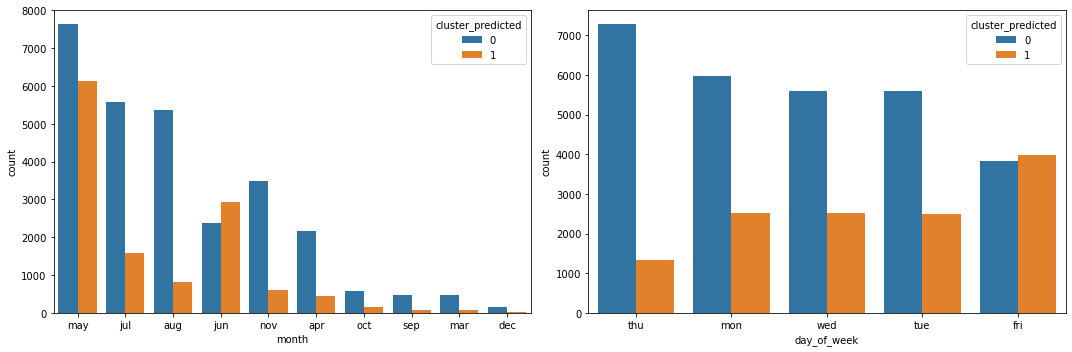

In [47]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['day_of_week'],order=combinedDf['day_of_week'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

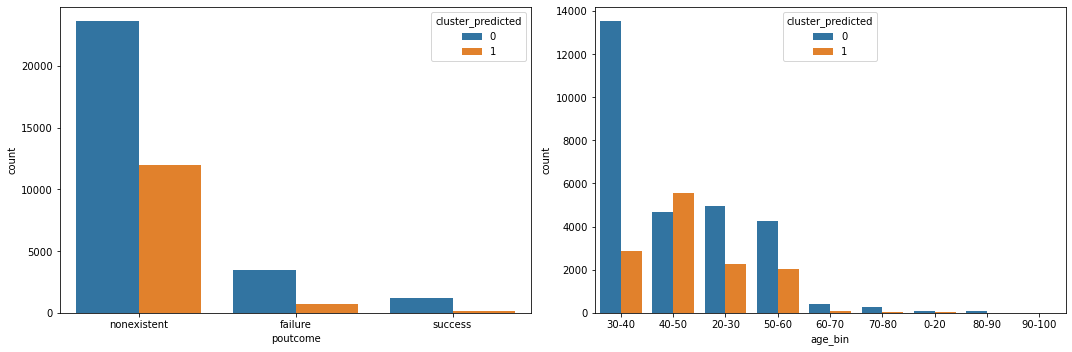

In [48]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['poutcome'],order=combinedDf['poutcome'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

### K_MEANS -> CLUSTERING



The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

    The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

K-Means Advantages :

1) If variables are huge, then  K-Means most of the times computationally faster than hierarchical clustering, if we keep k smalls.

2) K-Means produce tighter clusters than hierarchical clustering, especially if the clusters are globular.

K-Means Disadvantages :

1) Difficult to predict K-Value.
2) With global cluster, it didn't work well.
3) Different initial partitions can result in different final clusters.
4) It does not work well with clusters (in the original data) of Different size and Different density


In [64]:


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
train = pd.read_csv("train2.csv")

test = pd.read_csv("test2.csv")

In [65]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [66]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())
print(train.columns.values)
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****
       PassengerId      Pclass      

In [67]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [68]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

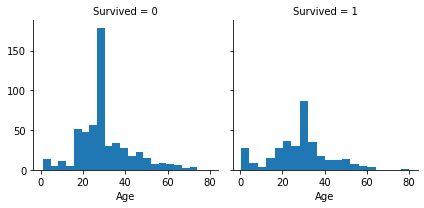

In [69]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

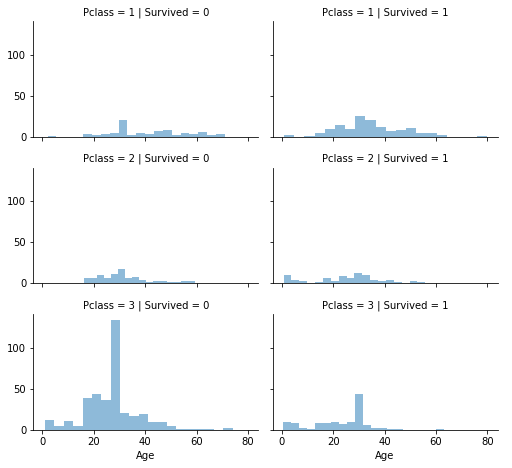

In [70]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [71]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [72]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])
X = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])

In [73]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(n_clusters=2)

In [74]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


In [75]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=2)

In [76]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


In [82]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [83]:
kmeans.fit(X_scaled)

KMeans(max_iter=600, n_clusters=2)

In [84]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.37373737373737376


### DBSCAN CLUSTERING 

Density based clustering algorithm has played a vital role in finding non linear shapes structure based on the density. Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is most widely used density based algorithm. It uses the concept of  density reachability and density connectivity.

Density Reachability - A point "p" is said to be density reachable from a point "q" if point "p" is within ε distance from point "q" and "q" has sufficient number of points in its neighbors which are within distance ε.

Density Connectivity - A point "p" and "q" are said to be density connected if there exist a point "r" which has sufficient number of points in its neighbors and both the points "p" and "q" are within the ε distance. This is chaining process. So, if "q" is neighbor of "r", "r" is neighbor of "s", "s" is neighbor of "t" which in turn is neighbor of "p" implies that "q" is neighbor of "p".

Advantages

1) Does not require a-priori specification of number of clusters.

2) Able to identify noise data while clustering.

3) DBSCAN algorithm is able to find arbitrarily size and arbitrarily shaped clusters.

Disadvantages

1) DBSCAN algorithm fails in case of varying density clusters.

2) Fails in case of neck type of dataset.
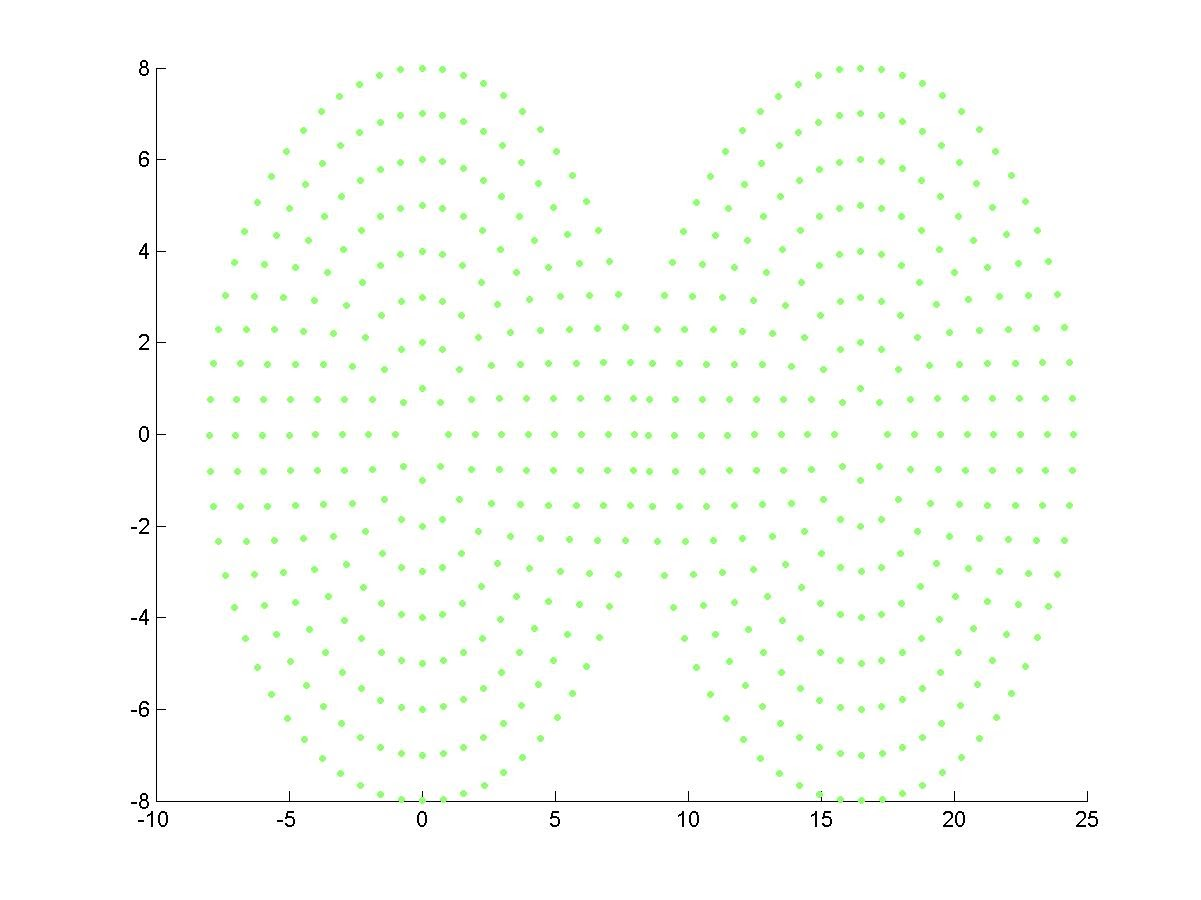

3) Does not work well in case of high dimensional data.

Finds core samples of high density and expands clusters from them.
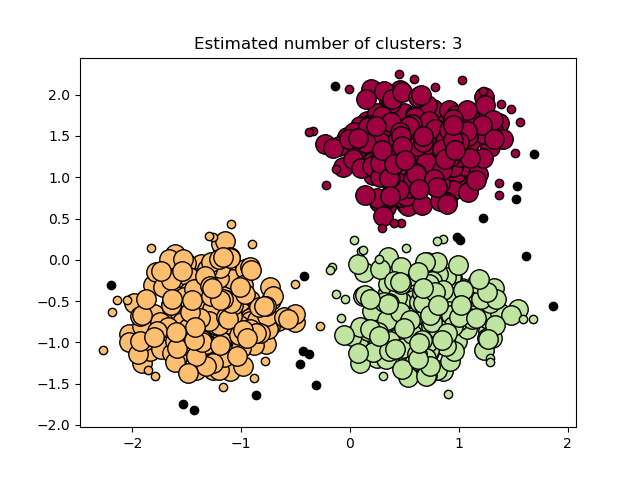

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


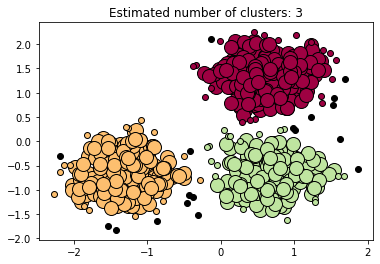

In [85]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# CLUSTERING COMPARISON

This example shows characteristics of different clustering algorithms on datasets that are “interesting” but still in 2D. With the exception of the last dataset, the parameters of each of these dataset-algorithm pairs has been tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.

The last dataset is an example of a ‘null’ situation for clustering: the data is homogeneous, and there is no good clustering. For this example, the null dataset uses the same parameters as the dataset in the row above it, which represents a mismatch in the parameter values and the data structure.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

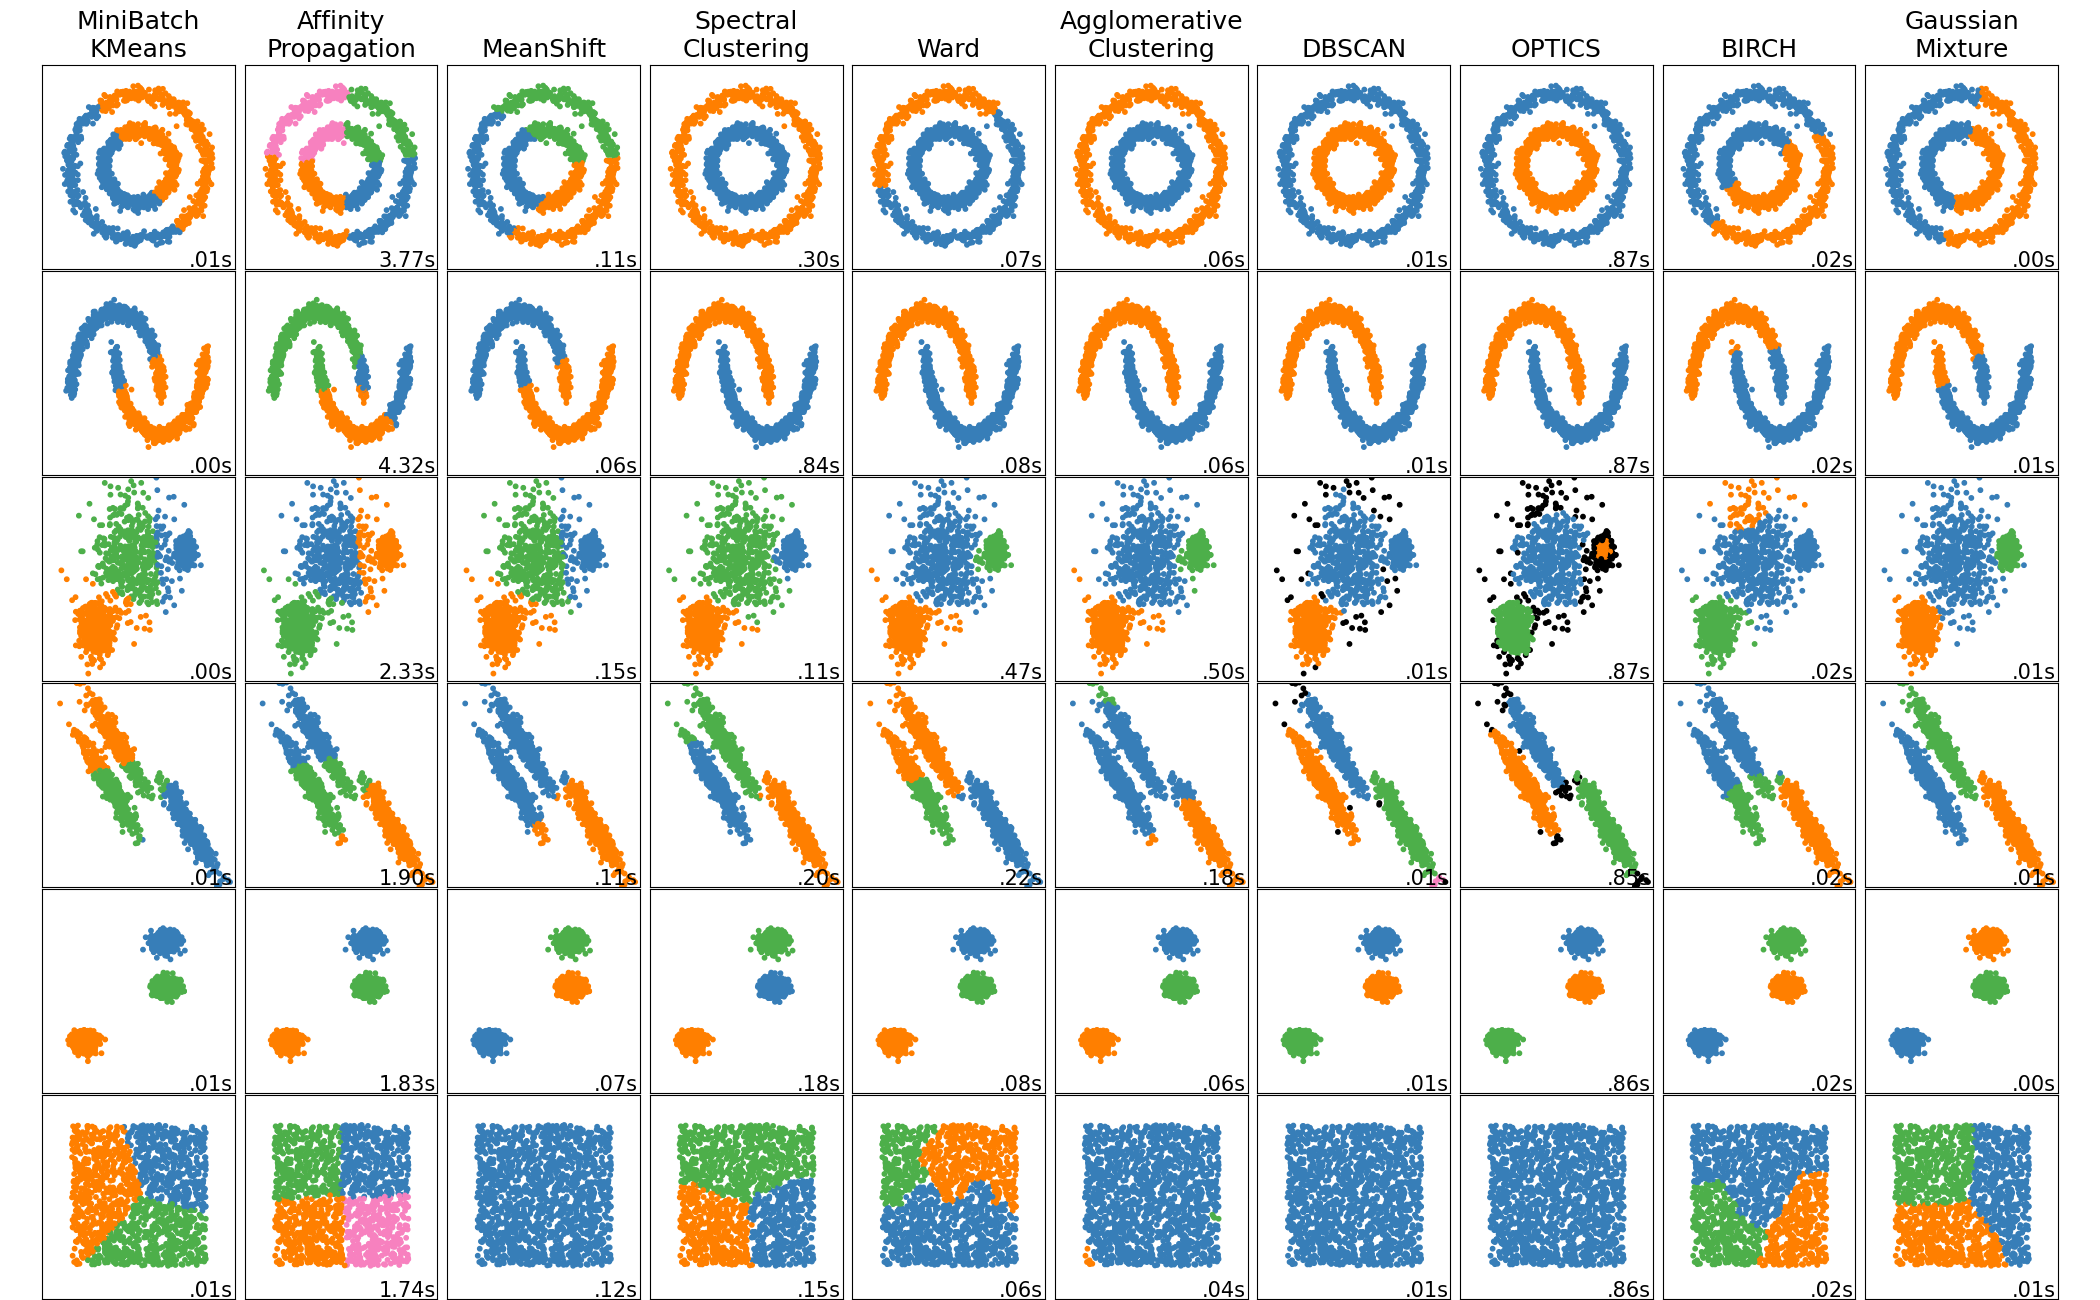

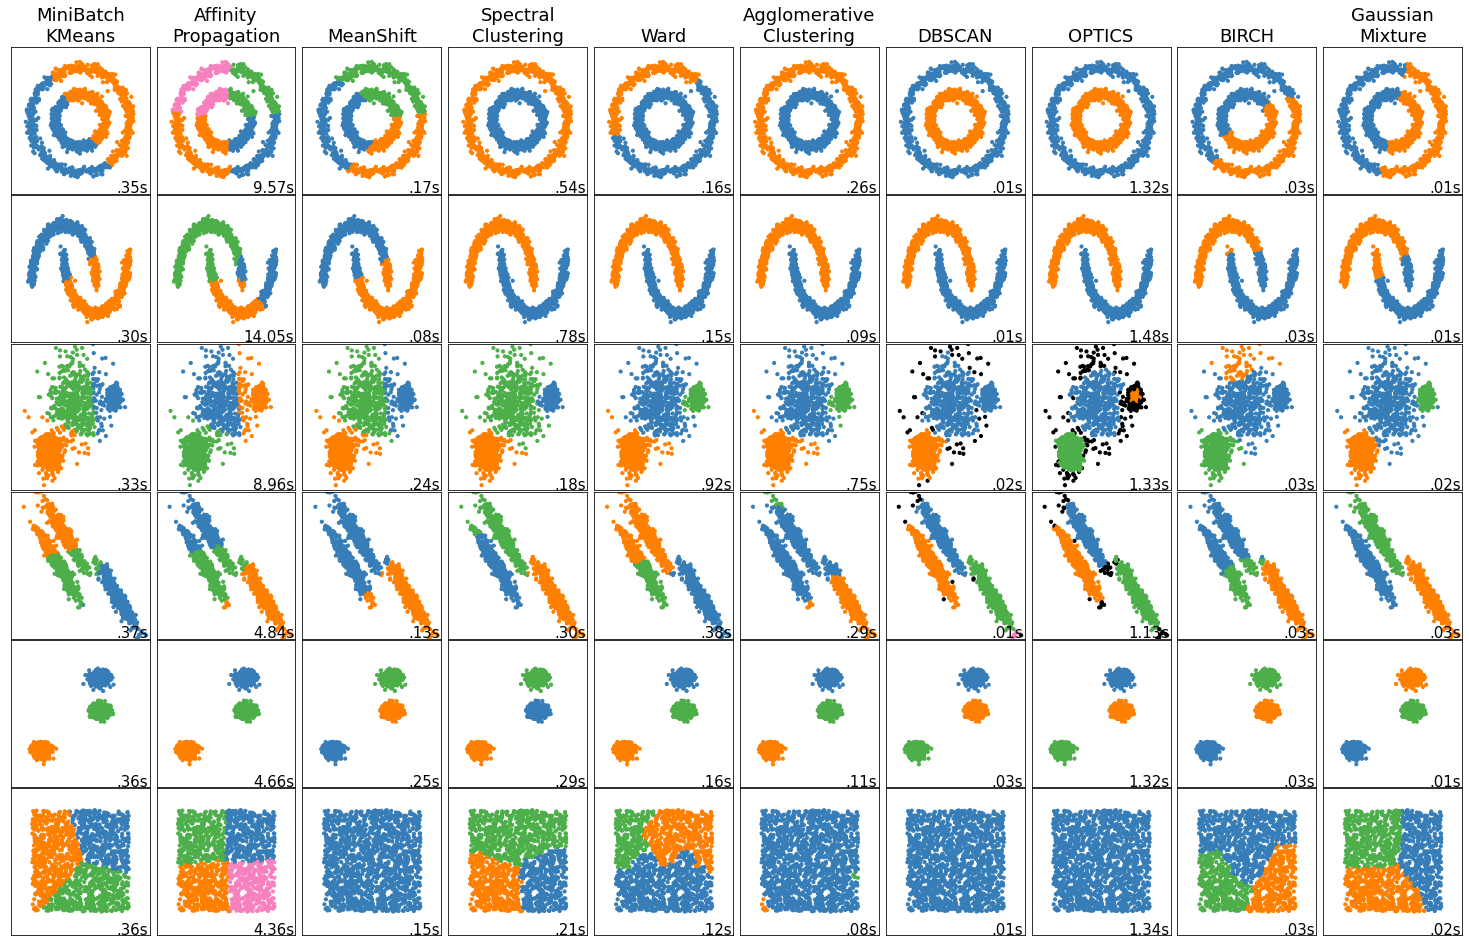

In [86]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

### For any questions :
    1 - Use SLACK channels
    2 - Email me via hasan@clarusway.com 
# Hasan SARMAN


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___